In [1]:
# 우선 필요한 라이브러리를 가져오겠습니다!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 시각화할 때 폰트 깨지는거 방지
import platform

try:
    system_name = platform.system()
    
    if system_name == 'Darwin':  # macOS
        plt.rcParams['font.family'] = 'AppleGothic'
    elif system_name == 'Windows':  # Windows
        plt.rcParams['font.family'] = 'Malgun Gothic'
    else:  # Linux (예: Ubuntu, Colab)
        plt.rcParams['font.family'] = 'NanumGothic'  # or 'DejaVu Sans'
    
    # 마이너스 부호 깨짐 방지
    plt.rcParams['axes.unicode_minus'] = False

except Exception as e:
    print(f"폰트 설정 중 오류 발생: {e}")
    print("그래프의 한글이 깨질 수 있습니다.")

In [3]:
df = pd.read_csv('ga_sessions_final.csv', low_memory=False)
df.head()

,date,fullVisitorId,trafficSource.source,trafficSource.medium,trafficSource.campaign,geoNetwork.country,totals.newVisits,totals.timeOnSite,totals.pageviews,totals.transactionRevenue,totals.transactions,action_type_count_1,action_type_count_2,action_type_count_3,action_type_count_5,action_type_count_6
0,20170501,8925775058441772312,google,organic,(not set),United States,1.0,780.0,15.0,NaN,NaN,4,4,0,0,0
1,20170501,7338873283276162840,google,organic,(not set),United States,NaN,323.0,13.0,NaN,NaN,2,2,4,0,0
2,20170501,5450771788016964217,google,organic,(not set),United States,1.0,391.0,17.0,NaN,NaN,2,1,0,0,0
3,20170501,2932641108554465304,(direct),(none),(not set),India,1.0,413.0,17.0,NaN,NaN,2,1,0,1,0
4,20170501,60403709444100883,google,organic,(not set),United States,NaN,617.0,14.0,NaN,NaN,3,2,0,0,0


| 필드명 | 설명 | 비고(단위/참고) |
|---|---|---|
| `date` | 세션이 발생한 날짜 | `YYYYMMDD` 형식(문자열) |
| `fullVisitorId` | 세션 방문자 ID | 사용자 식별자(세션 레벨 행에 반복) |
| `trafficSource.source` | 유입 경로 | 예: `google`, `(direct)` 등 |
| `trafficSource.medium` | 방문 매체 | 예: `organic`, `(none)`, `referral`, `cpc` |
| `trafficSource.campaign` | 캠페인 | 미설정 시 `(not set)` 가능 |
| `geoNetwork.country` | 국가 | 예: `United States`, `India` |
| `totals.newVisits` | 신규 방문 여부 | 0/1 (정수 플래그) |
| `totals.timeOnSite` | 사이트 체류 시간 합계 | 초(second) |
| `totals.pageviews` | 세션 내 전체 페이지뷰 수 | 정수(세션 레벨 합계) |
| `totals.transactionRevenue` | 세션 동안 발생한 거래 매출 합계 | **micros 단위** → 통화단위 사용 시 `÷ 1,000,000` |
| `totals.transactions` | 세션 내 거래(구매) 건수 | 정수(보통 0 또는 1+) |
| `action_type_count_1` | 상품 리스트 클릭/인터랙션 횟수 | `hits.eCommerceAction.action_type = 1` 집계 |
| `action_type_count_2` | 상품 상세보기 횟수 | `action_type = 2` 집계 |
| `action_type_count_3` | 장바구니 담기 횟수 | `action_type = 3` 집계 |
| `action_type_count_5` | 체크아웃 시작 횟수 | `action_type = 5` 집계 |
| `action_type_count_6` | 구매 완료 횟수 | `action_type = 6` 집계 |

* 원본 데이터 : Google Analytics Sample
* 데이터가 수집된 사이트 : Google Merchandise Store
* 기간 : 2017년 5월 1일 ~ 2017년 7월 31일
* 요약 (구글 애널리틱스에서 제공되는 데이터 종류) :
    * 트래픽 소스 데이터: 웹사이트 방문자의 출처에 대한 정보(자연 트래픽, 유료 검색 트래픽, 디스플레이 트래픽 등)
    * 콘텐츠 데이터: 사이트에서 사용자의 행동에 대한 정보(방문자가 보는 페이지의 URL, 콘텐츠와 상호 작용하는 방식 등)
    * 거래 데이터: 웹사이트에서 발생하는 거래에 관한 정보.
    * etc.

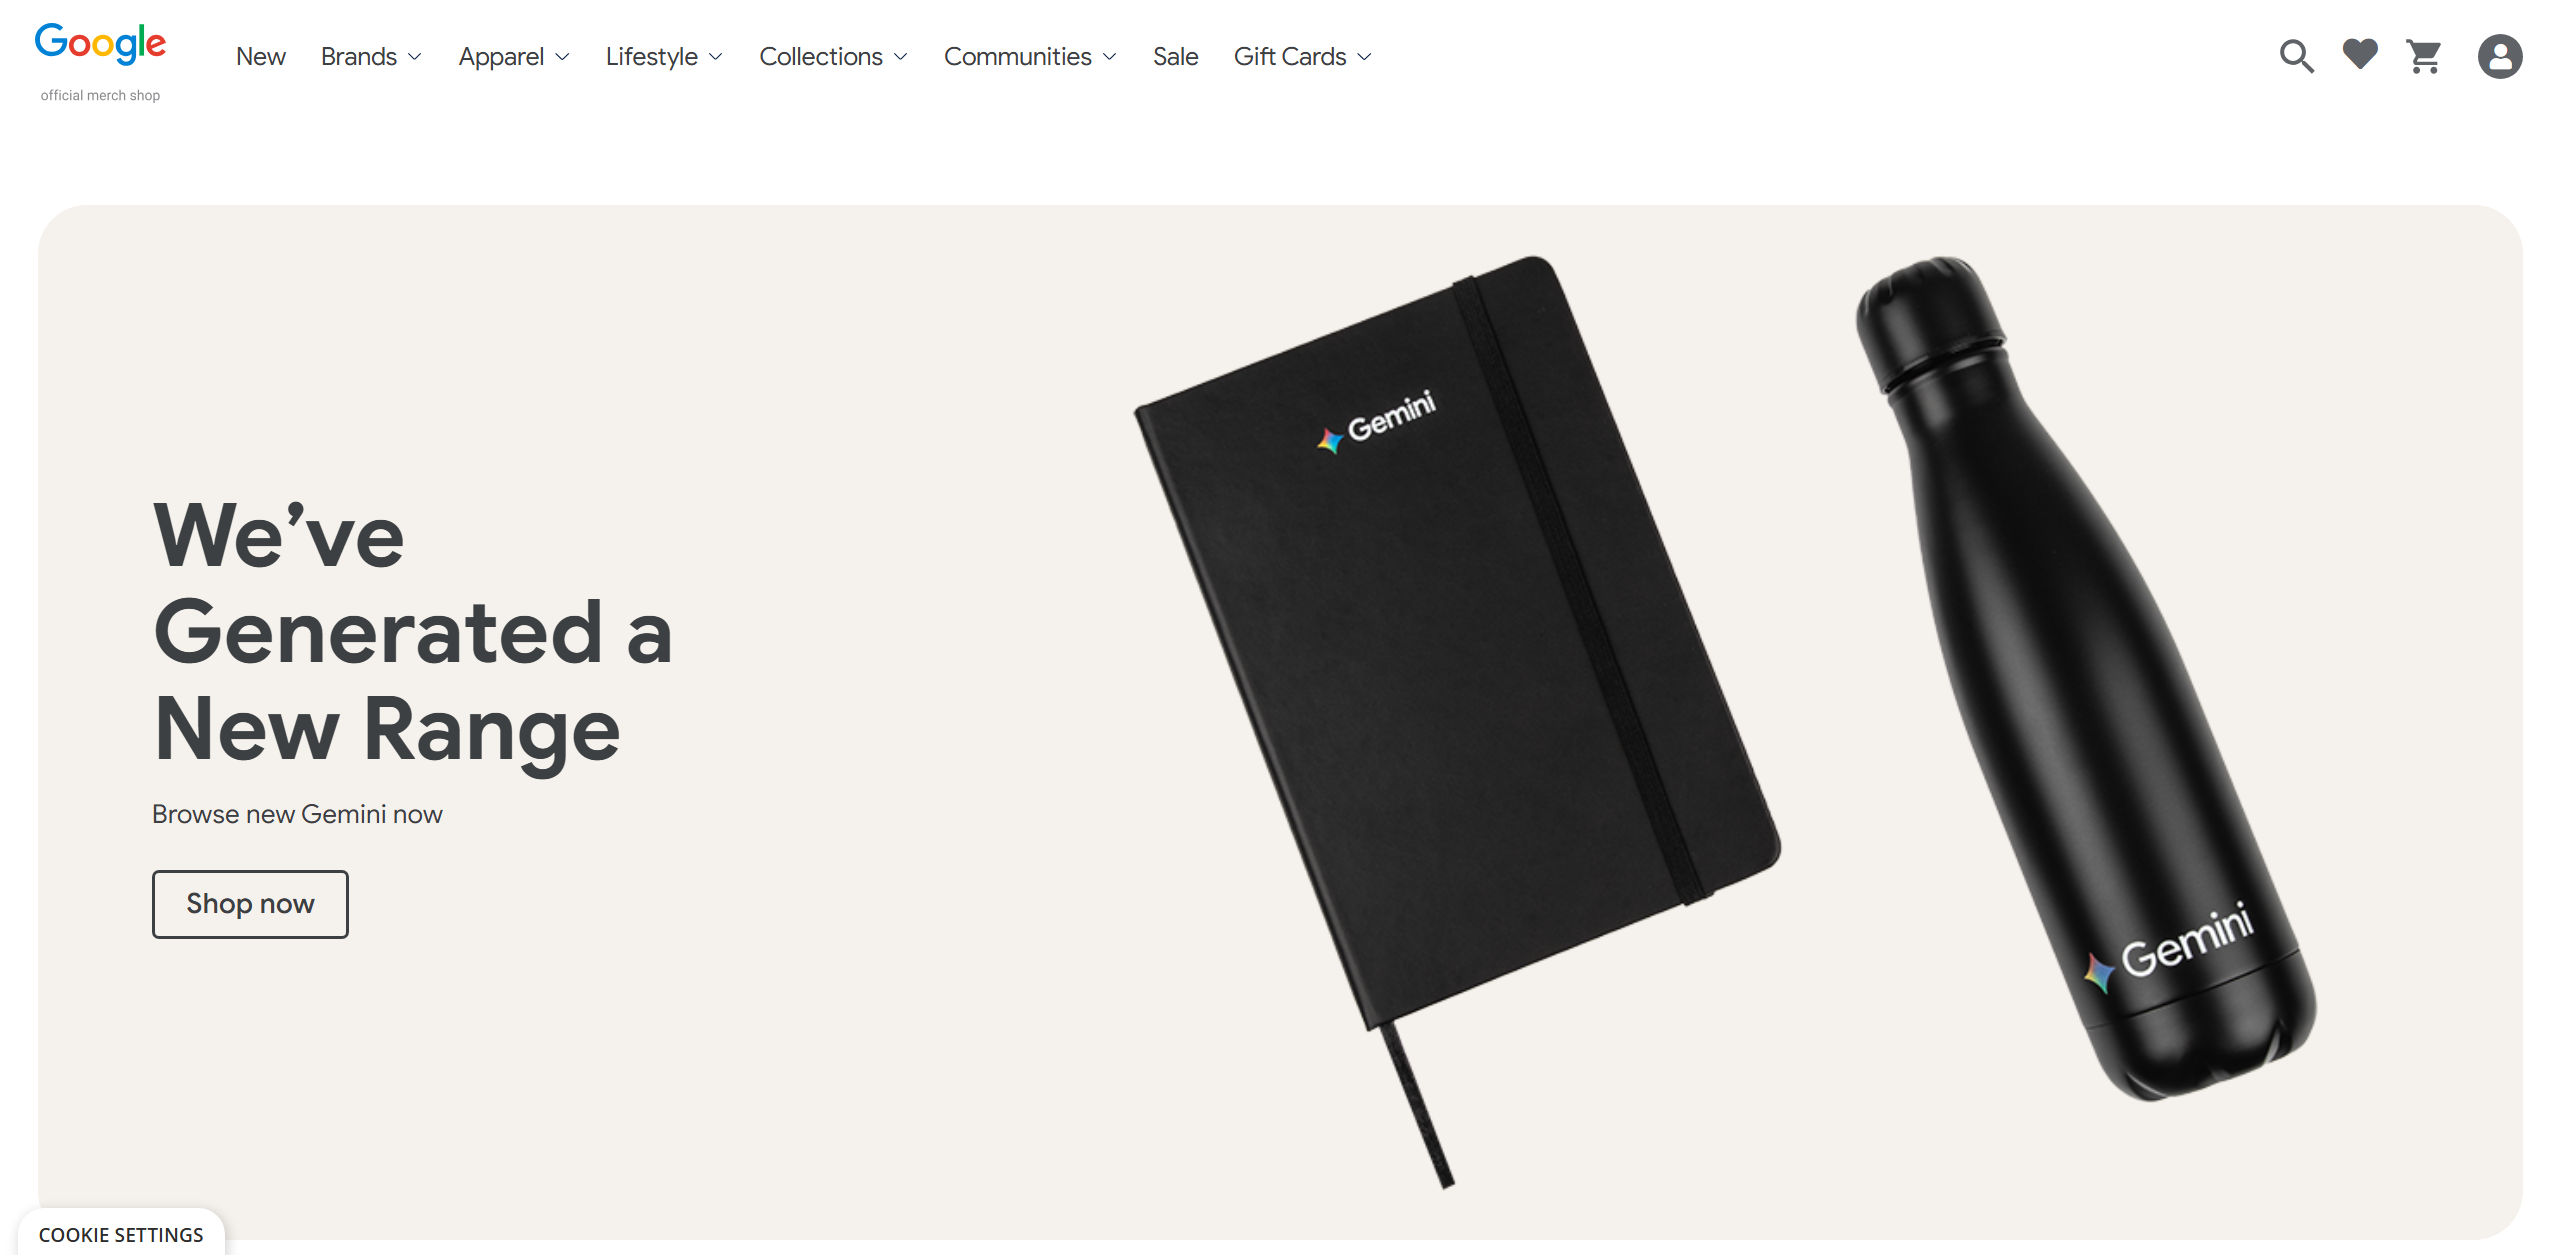

# <span style="background: linear-gradient(90deg,#6a5acd,#7bdff2,#b9fbc0); -webkit-background-clip: text; background-clip: text; color: transparent;">🚀 Acquisition: 사용자들을 어떻게 데려올 것인가?</span>

<p align="center" style="color:#6b7280;margin-top:4px;">
  신규 유입을 늘리고, 남게 하고, 결국 결제로 연결시키는 전 과정의 전략
</p>

<hr style="border:0; height:1px; background:linear-gradient(90deg,#e5e7eb,#d1d5db,#e5e7eb); margin:16px 0;">

<!-- 🔝 위쪽 레이아웃 끊기 -->
<div style="clear: both; display:block; height:0; overflow:hidden;"></div>

<!-- 설명 박스 (자체 끊김: overflow + contain) -->
<div style="border:1px solid #e5e7eb;border-radius:14px;padding:16px 18px;background:linear-gradient(180deg,#ffffff,#fafafa); word-break:break-word; overflow-wrap:anywhere; overflow:auto; contain:content; box-sizing:border-box;">
  <p style="margin:0;font-size:15px;line-height:1.6;color:#374151;">
    <strong>Acquisition</strong>은 우리 서비스로 <strong>신규 고객</strong>을 데려오는 모든 활동을 말해요. 
    핵심은 <strong>채널별 성과를 판별</strong>하는 것. 어떤 채널이 유저를 꾸준히 남게 하고,
    <strong>활동·결제 전환</strong>까지 이끄는지 알아야 예산을 똑똑하게 배분할 수 있죠.
  </p>
</div>

<!-- 왜 중요한가 -->
<details style="margin-top:10px;">
  <summary style="cursor:pointer;font-weight:700;">💡 왜 중요한가 (클릭해서 열기)</summary>
  <div style="border-left:4px solid #7c3aed;padding:10px 12px;margin-top:8px;background:#faf5ff;border-radius:8px; word-break:break-word; overflow-wrap:anywhere;">
    <ul style="margin:0 0 0 16px;color:#4b5563;">
      <li>채널별 ROI를 명확히 측정하고 예산을 <strong>효율적으로 배분</strong></li>
      <li>초기 유입이 <strong>잔존·결제</strong>로 이어지는 <em>질 좋은 트래픽</em> 선별</li>
      <li>캠페인 및 크리에이티브의 <strong>지속적인 실험·학습</strong> 루프 구축</li>
    </ul>
  </div>
</details>

<!-- 🔝 KPI 위쪽 끊기 -->
<div style="clear: both; display:block; height:0; overflow:hidden;"></div>

## 📊 KPI 예시

<!-- 플렉스 카드 컨테이너 (부모가 자식 높이 인식하게 BFC 생성) -->
<div style="display:flex; flex-wrap:wrap; gap:12px; align-items:stretch; clear:both; overflow:auto; contain:content; box-sizing:border-box;">

  <!-- 카드 1 -->
  <div style="flex:1 1 260px; min-width:260px; border:1px solid #e5e7eb; border-radius:14px; padding:14px; background:#ffffff; box-sizing:border-box; word-break:break-word; overflow-wrap:anywhere;">
    <div style="font-weight:700;">🧭 세션 수</div>
    <div style="font-size:13px; color:#6b7280; margin-top:4px;">
      채널·캠페인별 트래픽 규모 파악의 기본 지표
    </div>
    <div style="margin-top:8px;">
      <span style="background:#eef2ff;color:#3730a3;border-radius:999px;padding:4px 8px;font-size:12px;">규모</span>
      <span style="background:#ecfeff;color:#155e75;border-radius:999px;padding:4px 8px;font-size:12px;">유입강도</span>
    </div>
  </div>

  <!-- 카드 2 -->
  <div style="flex:1 1 260px; min-width:260px; border:1px solid #e5e7eb; border-radius:14px; padding:14px; background:#ffffff; box-sizing:border-box; word-break:break-word; overflow-wrap:anywhere;">
    <div style="font-weight:700;">⏱️ 체류 시간</div>
    <div style="font-size:13px; color:#6b7280; margin-top:4px;">
      유입 품질·콘텐츠 적합도를 보여주는 참여 지표
    </div>
    <div style="margin-top:8px;">
      <span style="background:#f0fdf4;color:#166534;border-radius:999px;padding:4px 8px;font-size:12px;">참여도</span>
      <span style="background:#fff7ed;color:#9a3412;border-radius:999px;padding:4px 8px;font-size:12px;">관심도</span>
    </div>
  </div>

  <!-- 카드 3 -->
  <div style="flex:1 1 260px; min-width:260px; border:1px solid #e5e7eb; border-radius:14px; padding:14px; background:#ffffff; box-sizing:border-box; word-break:break-word; overflow-wrap:anywhere;">
    <div style="font-weight:700;">🔁 재방문자 비율</div>
    <div style="font-size:13px; color:#6b7280; margin-top:4px;">
      채널이 <strong>지속 사용</strong>으로 이어지는지 확인하는 잔존 지표
    </div>
    <div style="margin-top:8px;">
      <span style="background:#fdf4ff;color:#7e22ce;border-radius:999px;padding:4px 8px;font-size:12px;">리텐션</span>
      <span style="background:#fff1f2;color:#9f1239;border-radius:999px;padding:4px 8px;font-size:12px;">충성도</span>
    </div>
  </div>

</div>

<!-- 🔚 KPI 아래 끊기 -->
<div style="clear: both; display:block; height:0; overflow:hidden;"></div>

<!-- 보너스 팁 박스 (자체 끊김: overflow + contain) -->
<div style="margin-top:14px;padding:10px 12px;border:1px dashed #e5e7eb;border-radius:12px;background:#fcfcfd; word-break:break-word; overflow-wrap:anywhere; overflow:auto; contain:content; box-sizing:border-box;">
  <span style="font-weight:700;">📌 팁:</span>
  <span style="color:#4b5563;">KPI는 <strong>채널 비교</strong>가 핵심! 동일한 기간·세그먼트(예: 신규/재방문) 기준으로 비교하세요.</span>
</div>


## 1.1. 유입경로

### (1)최다 유입 경로

구글 MD 샵에는 어느 경로로 사람들이 들어는걸까요? 상위 10개 유입 경로를 파악해보겠습니다.

In [ ]:
# 상위 10개 유입 경로를 파악해보겠습니다.

kdf = df.copy()
kdf["source"] = kdf["trafficSource.source"]

# 유입 경로별 등장 횟수를 집계하여 상위 10개를 보겠습니다.
df_inflow = (
    kdf["source"]
      .***(dropna=True)              # 각 경로별로 개수를 세볼게요! 결측치는 제외하겠습니다.
      .rename_axis("source")         # 인덱스 이름을 'source'로 붙이겠습니다.
      .reset_index(name="count")     # 빈도를 'count' 컬럼으로 바꾸겠습니다.
      .head(10)                      # 상위 10개만 보겠습니다.
)

# 결과를 바로 확인하겠습니다.
display(df_inflow)

,source,count
0,google,91088
1,(direct),78836
2,youtube.com,9780
3,analytics.google.com,5594
4,Partners,4418
5,m.facebook.com,1624
6,google.com,1157
7,dfa,907
8,sites.google.com,652
9,reddit.com,553


구글을 통한 유입이 제일 많네요!<br>
그 다음에는 사이트로 직접 들어온 유입이네요.

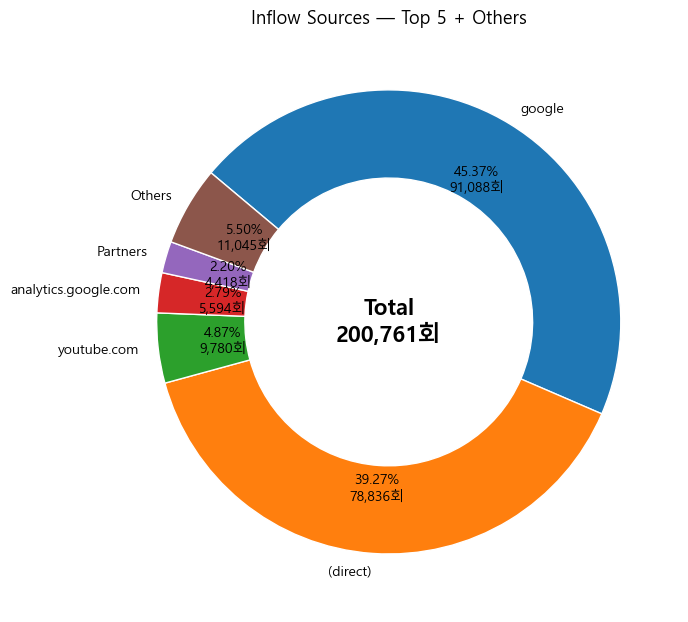

In [5]:
# 도넛 차트로 상위 유입 경로를 한눈에 보겠습니다.

# 소스 컬럼을 결측과 공백을 정리합니다.
vc = (
    kdf["source"]
      .fillna("(not set)")
      .astype(str).str.strip()
      .value_counts()
)

# 집계를 표 형태로 바꿉니다.
base = vc.rename_axis("source").reset_index(name="count")
base["count"] = pd.to_numeric(base["count"], errors="coerce").fillna(0).astype(int)

# 상위 5개와 나머지를 Others로 묶습니다.
top5 = base.head(5).copy()
others = int(base["count"].iloc[5:].sum())
if others > 0:
    top5 = pd.concat([top5, pd.DataFrame([{"source": "Others", "count": others}])], ignore_index=True)

labels = top5["source"].tolist()
values = top5["count"].to_numpy()
total  = int(values.sum())

# 퍼센트와 건수를 웨지 안에 같이 표시합니다.
def autopct_fmt(vals):
    s = np.sum(vals)
    def _fmt(pct):
        v = int(round(pct * s / 100.0))
        return f"{pct:.2f}%\n{v:,}회"
    return _fmt

# 도넛 차트를 그립니다.
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(
    values,
    labels=labels,
    startangle=140,
    counterclock=False,
    autopct=autopct_fmt(values),
    pctdistance=0.72,
    labeldistance=1.08,
    wedgeprops=dict(width=0.38, edgecolor="white")
)

# 가운데에 총합을 표시합니다.
ax.text(0, 0, f"Total\n{total:,.0f}회", ha="center", va="center", fontsize=16, fontweight="bold")

# 제목을 붙이고 모양을 정리합니다.
ax.set_title("Inflow Sources — Top 5 + Others", fontsize=13)
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

### (2) 일별 유입 경로

전체 세션 대비 비율은 파악했습니다. 이번에는 day by day로 파악해보겠습니다.<br>
1위 유입경로가 바뀔 수 있으니까요. 바뀐다면 그 원인은 찾아볼 수도 있겠습니다.

`.size()`는 데이터의 총 수의 갯수를 구합니다.<br>
즉, Series일 경우 행의 수를 반환하고 DataFrame의 경우 행의수 x 열의수 를 반환합니다.

`apply()`함수는 DataFrame의 칼럼에 복잡한 연산을 vectorizing할 수 있게 해주는 함수로 매우 많이 활용되는 함수에요.

`apply()` 함수는 간단한 경우 lambda() 함수를 적용할 수 있으며, 복잡한 경우 사용자 정의 함수를 적용할 수도 있습니다.

In [ ]:
# 원본을 보존하기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 날짜를 YYYYMMDD에서 datetime.date로 변환하겠습니다.
kdf["session_date"] = (
    pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.date
)

# 일자와 소스별 방문수를 집계하겠습니다.
grouped = (
    kdf.groupby(["***", "***"], dropna=False)
       .size()
       .reset_index(name="visit_count")
       .rename(columns={"trafficSource.source": "source"})
)

# 각 날짜마다 방문수 상위 5개 소스만 남기겠습니다.
df_daily = (
    grouped.groupby("session_date", group_keys=False)
           .apply(lambda g: g.nlargest(5, "visit_count"))
           .reset_index(drop=True)
           .rename(columns={"session_date": "date"})
)

# 결과 일부를 확인하겠습니다.
df_daily.head(20)

C:\Users\Allen\AppData\Local\Temp\ipykernel_27452\2816227501.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(5, "visit_count"))


,date,source,visit_count
0,2017-05-01,google,1051
1,2017-05-01,(direct),787
2,2017-05-01,youtube.com,313
3,2017-05-01,m.facebook.com,151
4,2017-05-01,analytics.google.com,58
5,2017-05-02,google,1146
6,2017-05-02,(direct),837
7,2017-05-02,youtube.com,251
8,2017-05-02,m.facebook.com,71
9,2017-05-02,analytics.google.com,64


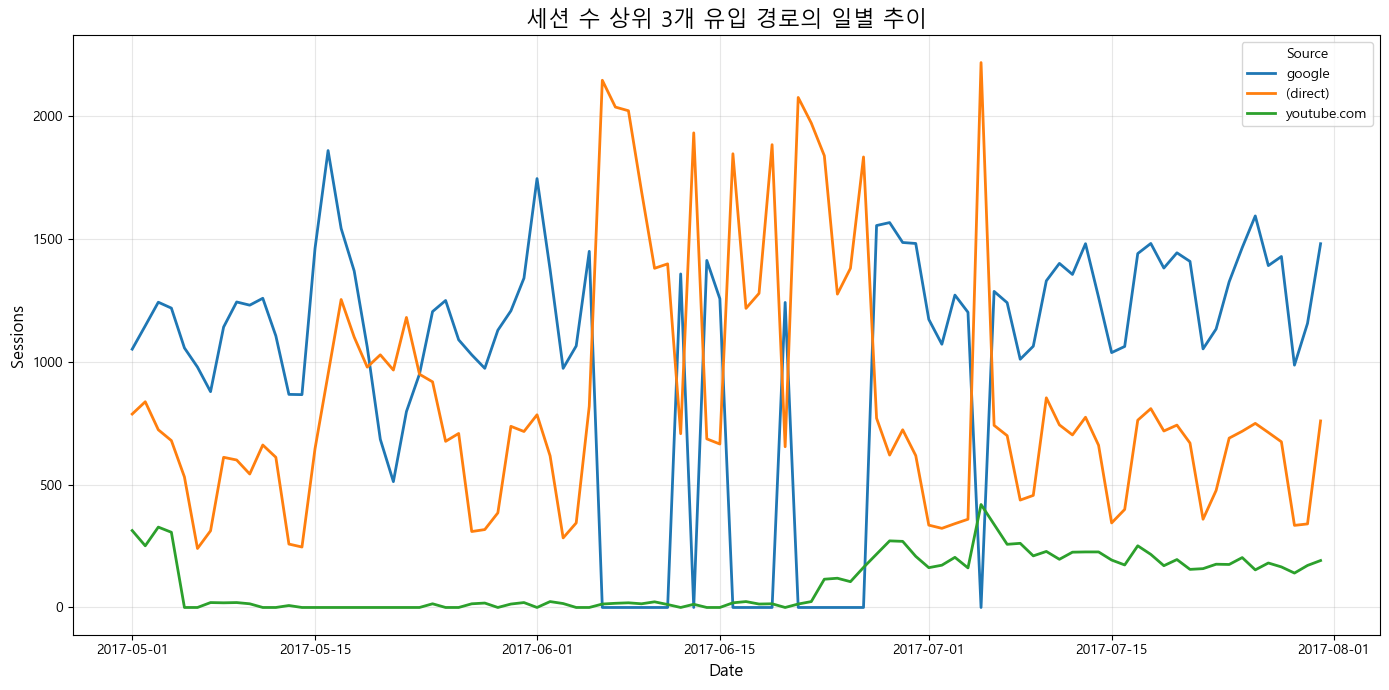

In [7]:
# 일별 상위 소스 추이를 라인 차트로 보겠습니다.

# 피벗을 만들어 날짜×소스 형태로 바꾸겠습니다.
pivot_df = df_daily.pivot(index="date", columns="source", values="visit_count").fillna(0)

# 전체 합 기준 상위 3개 소스만 남기겠습니다.
top3 = pivot_df.sum().nlargest(3).index
pivot_df = pivot_df[top3]

# 라인 차트를 그리겠습니다.
plt.figure(figsize=(14, 7))
for src in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[src], label=src, linewidth=2)

# 차트의 제목과 라벨을 추가하겠습니다.
plt.title("세션 수 상위 3개 유입 경로의 일별 추이", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sessions", fontsize=12)

# 보조선을 추가하고 범례를 표시하겠습니다.
plt.grid(alpha=0.3)
plt.legend(title="Source")

# 여백을 정리하고 보여주겠습니다.
plt.tight_layout()
plt.show()


전반적으로 구글을 통한 접속이 우세하다가, direct랑 뒤집히는 경우가 있네요?!<br>
6월 전반적으로 그런 것으로 파악되는데요.<br>
실제 프로젝트라면 원인을 찾아볼만한 흐름입니다.<br>
데이터 자체의 문제일 수도 있고, 혹은 외부의 요인이 개입했을 가능성도 있습니다.

`.agg()`메서드는 apply와 비슷하게 함수를 적용하는 메서드이지만, 여러개의 함수를 동시에 적용할 수 있다는 장점이 있습니다.

### (3) 유입 경로별 신규/재방문자의 비율

In [ ]:
# 원본을 보존하기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 유입 경로를 보기 쉽게 별칭 컬럼으로 복사하겠습니다.
kdf["source"] = kdf["trafficSource.source"]

# 신규 방문 여부를 숫자로 강제 변환하겠습니다.
kdf["newVisits_num"] = pd.to_numeric(kdf["totals.newVisits"], errors="coerce")

# 유입 경로별로 방문 수와 신규 방문 수를 집계하겠습니다.
agg = (
    kdf.groupby("source", dropna=False)
       .***(
           visit_count=("source", "size"),
           new_visitors=("newVisits_num", lambda s: np.nansum(s == 1.0))
       )
       .reset_index()
)

# 재방문 수와 비율 지표를 계산하겠습니다.
agg["returning_visitors"] = agg["visit_count"] - agg["new_visitors"]
agg["new_visitors_rate"] = np.where(agg["visit_count"] > 0, agg["new_visitors"] / agg["visit_count"], np.nan)
agg["returning_visitors_rate"] = np.where(agg["visit_count"] > 0, agg["returning_visitors"] / agg["visit_count"], np.nan)

# 방문 수 기준 상위 10개 유입 경로만 깔끔하게 정리해서 보여주겠습니다.
df_visit = (
    agg.sort_values("visit_count", ascending=False)
       .loc[:, ["source", "visit_count", "new_visitors_rate", "returning_visitors_rate"]]
       .head(10)
       .reset_index(drop=True)
)

df_visit

,source,visit_count,new_visitors_rate,returning_visitors_rate
0,google,91088,0.790620,0.209380
1,(direct),78836,0.709016,0.290984
2,youtube.com,9780,0.919121,0.080879
3,analytics.google.com,5594,0.609939,0.390061
4,Partners,4418,0.746718,0.253282
5,m.facebook.com,1624,0.889778,0.110222
6,google.com,1157,0.869490,0.130510
7,dfa,907,0.076075,0.923925
8,sites.google.com,652,0.277607,0.722393
9,reddit.com,553,0.728752,0.271248


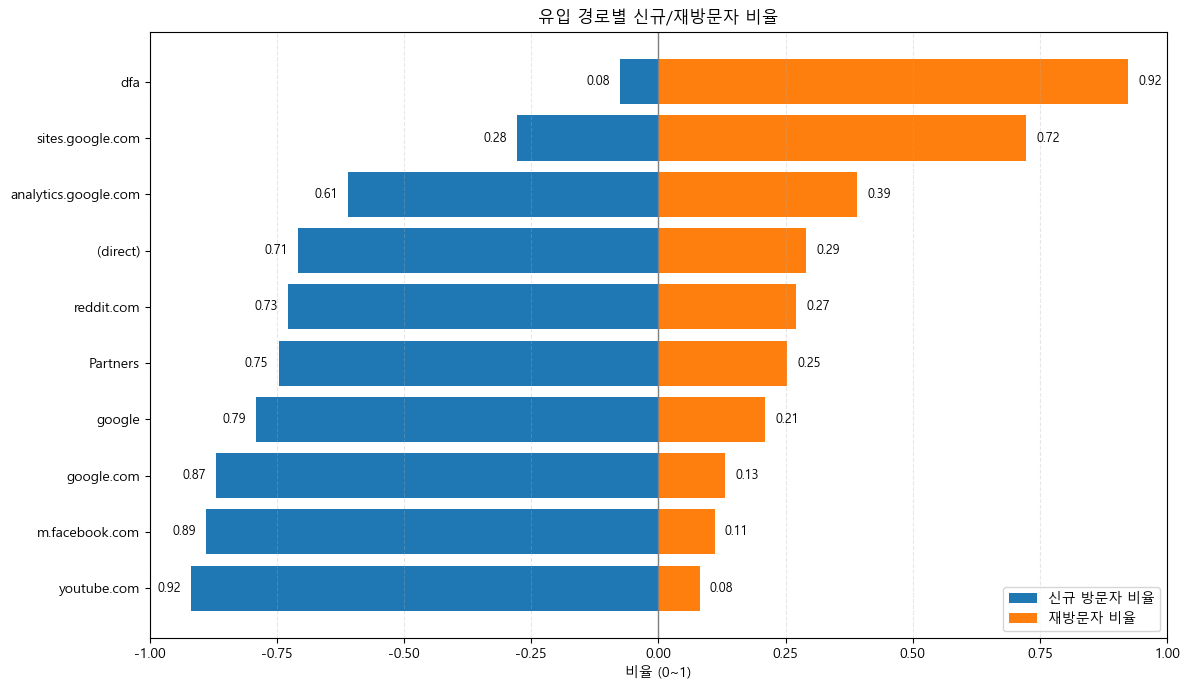

In [9]:
# 표시용 데이터프레임을 복사하고 결측 비율은 0으로 바꾸겠습니다.
plot_df = df_visit.copy()
plot_df["new_visitors_rate"] = plot_df["new_visitors_rate"].fillna(0.0)
plot_df["returning_visitors_rate"] = plot_df["returning_visitors_rate"].fillna(0.0)

# 신규 방문자 비율이 큰 순서대로 정렬하겠습니다.
plot_df = plot_df.sort_values("new_visitors_rate", ascending=False).reset_index(drop=True)

# 좌우 양분 막대를 그리기 위한 값과 라벨을 준비하겠습니다.
y = np.arange(len(plot_df))
left_vals  = -plot_df["new_visitors_rate"].to_numpy()      # 왼쪽에는 신규 비율을 음수로 두겠습니다.
right_vals =  plot_df["returning_visitors_rate"].to_numpy() # 오른쪽에는 재방문 비율을 두겠습니다.
labels = plot_df["source"].tolist()

# 단순하게 0~1 비율 스케일로 그리겠습니다.
xlim_left, xlim_right = -1.0, 1.0

# 그래프를 그리고 제목/라벨을 붙이겠습니다.
plt.figure(figsize=(12, 7))
ax = plt.gca()
ax.barh(y, left_vals,  label="신규 방문자 비율")
ax.barh(y, right_vals, label="재방문자 비율")
ax.axvline(0, color="gray", linewidth=1)  # 중앙 기준선을 표시하겠습니다.
ax.set_yticks(y, labels)
ax.set_xlim(xlim_left, xlim_right)
ax.set_xlabel("비율 (0~1)")
ax.set_title("유입 경로별 신규/재방문자 비율")
ax.legend(loc="lower right")
ax.grid(axis="x", linestyle="--", alpha=0.3)

# 막대 끝에 값을 간단히 표기하겠습니다.
for i, (lv, rv) in enumerate(zip(left_vals, right_vals)):
    ax.text(lv - 0.02, i, f"{abs(lv):.2f}", va="center", ha="right", fontsize=9)
    ax.text(rv + 0.02, i, f"{rv:.2f}",     va="center", ha="left",  fontsize=9)

plt.tight_layout()
plt.show()

* **dfa**: Google의 DFA(Campaign Manager 360의 이전 버전) 광고 캠페인에서 유입
* **sites.google.com**: 다른 사용자가 만든 Google Sites 페이지에 판매자의 웹사이트 링크가 포함되어 있어, 해당 링크를 통해 방문자가 유입 (이번 분석에서 판매자는 Goolge Merchandise Store)

### (4) 유입 경로별 체류 시간

In [ ]:
# 원본을 지키기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 체류 시간을 숫자로 바꿔서 계산이 가능하도록 하겠습니다.
kdf["timeOnSite_num"] = pd.to_numeric(kdf["totals.timeOnSite"], errors="coerce")

# 유입 경로별로 방문 수와 체류 시간 중앙값을 집계하겠습니다.
df_timeOnScreen = (
    kdf.groupby("trafficSource.source")
       .***(
           visit_count=("trafficSource.source", "size"), # `trafficSource.source`에 size를 적용..~
           median_screen_time=("timeOnSite_num", "median") # `timeOnSite_num`에 median을 적용..~
       )
       .rename_axis(None)
       .reset_index()
       .rename(columns={"index": "source"})
       .sort_values("visit_count", ascending=False)
       .head(10)
       .reset_index(drop=True)
)

# 결과를 확인하겠습니다.
df_timeOnScreen

,source,visit_count,median_screen_time
0,google,91088,91.0
1,(direct),78836,108.0
2,youtube.com,9780,73.0
3,analytics.google.com,5594,89.5
4,Partners,4418,109.0
5,m.facebook.com,1624,66.5
6,google.com,1157,99.0
7,dfa,907,110.0
8,sites.google.com,652,43.0
9,reddit.com,553,45.0


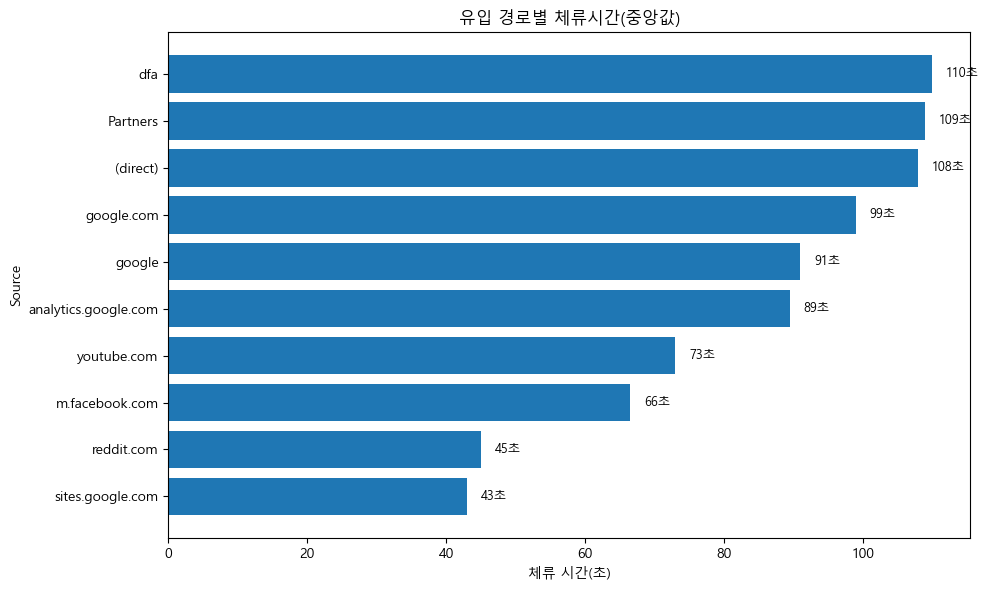

In [ ]:
# 유입 경로별 체류시간(중앙값)을 가로 막대로 단순히 그려서 비교하겠습니다.

# 데이터는 복사본으로 정렬만 해서 사용하겠습니다.
plot_df = df_timeOnScreen.copy().sort_values("median_screen_time", ascending=True)

# 가로 막대를 그려서 값을 한눈에 비교하겠습니다.
plt.figure(figsize=(10, 6))
bars = plt.barh(plot_df["source"], plot_df["median_screen_time"])

# 각 막대 끝에 값을 초 단위로 표시하겠습니다.
for bar, val in zip(bars, plot_df["median_screen_time"]):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f"{int(val)}초", va="center", fontsize=9)

# 제목과 축 라벨을 간단히 달겠습니다.
plt.title("유입 경로별 체류시간(중앙값)")
plt.xlabel("체류 시간(초)")
plt.ylabel("Source")

# 레이아웃을 자동으로 정리하겠습니다.
plt.tight_layout()
plt.show()

* Partner: Google과 제휴 관계에 있는 타사 플랫폼이나 서비스를 통해 유입된 트래픽

## 1.2. 캠페인별 세션 수

In [ ]:
# 캠페인별로 방문 수를 간단히 집계해서 많이 온 순으로 보여주겠습니다.

kdf = df.copy()  # 원본을 보호하기 위해 복사본에서 작업하겠습니다.

df_campaign = (
    kdf.***("trafficSource.campaign", dropna=False)       # 결측 캠페인도 하나의 그룹으로 보겠습니다.
      .***()                                              # 각 캠페인의 방문 수를 세겠습니다.
      .reset_index(name="visit_count")                    # 방문 수를 컬럼으로 변환하겠습니다.
      .rename(columns={"trafficSource.campaign": "campaign"})  # 컬럼 이름을 읽기 쉽게 바꾸겠습니다.
      .sort_values("visit_count", ascending=False)        # 방문 수가 많은 순서로 정렬하겠습니다.
      .reset_index(drop=True)                             # 정렬 후 인덱스를 다시 매기겠습니다.
)

df_campaign.head(20)  # 상위 20개를 미리 확인하겠습니다.

,campaign,visit_count
0,(not set),191276
1,Data Share Promo,4418
2,AW - Accessories,3002
3,AW - Dynamic Search Ads Whole Site,2038
4,AW - Apparel,25
5,AW - Electronics,2


## 1.3. 방문 매체별 세션 수

In [ ]:
# 유입 매체(medium)별 방문 수를 간단히 집계해서 많이 온 순서로 보여주겠습니다.

kdf = df.copy()  # 원본을 보호하기 위해 복사본에서 작업하겠습니다.

df_medium = (
    kdf.***("trafficSource.medium", dropna=False)         # 결측 매체도 하나의 그룹으로 보겠습니다.
      .***()                                              # 각 매체의 방문 수를 세겠습니다.
      .reset_index(name="visit_count")                    # 방문 수를 컬럼으로 변환하겠습니다.
      .rename(columns={"trafficSource.medium": "medium"}) # 컬럼 이름을 읽기 쉽게 바꾸겠습니다.
      .sort_values("visit_count", ascending=False)        # 방문 수가 많은 순서로 정렬하겠습니다.
      .reset_index(drop=True)                             # 정렬 후 인덱스를 다시 매기겠습니다.
)

df_medium.head(20)  # 상위 20개를 미리 확인하겠습니다.


,medium,visit_count
0,organic,86564
1,(none),78834
2,referral,24213
3,cpc,5321
4,affiliate,4418
5,cpm,1405
6,(not set),6


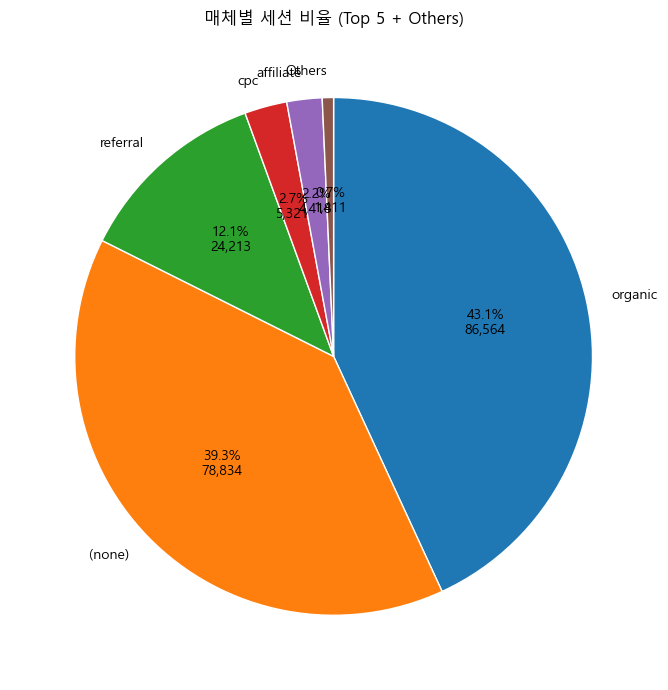

In [14]:
# 이 매체별 비중을 Top 5 + Others로 간단히 파악해보겠습니다.

N = 5  # 상위에 노출할 매체 개수를 정하겠습니다.
top5 = df_medium.head(N).copy()  # 상위 N개 매체를 가져오겠습니다.

# 상위 N개 이후의 방문 수를 합쳐서 Others로 묶겠습니다.
others_count = int(df_medium["visit_count"].iloc[N:].sum())
if others_count > 0:
    top5 = pd.concat(
        [top5, pd.DataFrame([{"medium": "Others", "visit_count": others_count}])],
        ignore_index=True
    )

# 파이차트에 넣을 라벨과 값을 준비하겠습니다.
labels = top5["medium"].tolist()
values = top5["visit_count"].astype(float).to_numpy()
total = values.sum()

# 방문 수의 총합이 0이면 차트를 그리지 않겠습니다.
if total == 0:
    print("방문 수가 없어 파이차트를 생략합니다.")
else:
    # 퍼센트와 건수를 함께 보여주는 간단한 포맷터를 만들겠습니다.
    def _autopct(pct):
        cnt = int(round(total * pct / 100.0))
        return f"{pct:.1f}%\n{cnt:,}"

    # 파이차트를 그리겠습니다.
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.pie(
        values,
        labels=labels,          # 조각 라벨로 매체명을 표시하겠습니다.
        autopct=_autopct,       # 퍼센트와 건수를 함께 표기하겠습니다.
        startangle=90,          # 위쪽에서 시작하겠습니다.
        counterclock=False,     # 시계 방향으로 돌리겠습니다.
        wedgeprops=dict(linewidth=1, edgecolor="white")  # 경계선을 넣어 가독성을 높이겠습니다.
    )
    ax.set_title("매체별 세션 비율 (Top 5 + Others)")
    ax.set_aspect("equal")  # 원형 비율을 유지하겠습니다.
    plt.tight_layout()
    plt.show()


**none**
* 보통 직접 방문(Direct Traffic)을 의미.
* 사용자가 URL을 직접 입력하거나 즐겨찾기를 통해 접속하는 경우, 캠페인 정보 없이 medium이 "(none)"으로 표시됨.

**referral**
* 다른 웹사이트에서 링크를 통해 유입된 트래픽.
* 방문자가 외부 사이트의 링크를 클릭해 도착한 경우 medium이 "referral"로 설정됨.

**organic**
* 유료 광고가 아닌, 검색엔진의 자연 검색 결과(Organic Search)에서 유입된 트래픽.
* 구글, 네이버, 빙 등에서 자연 검색 결과로 방문했을 때 medium은 "organic".

**affiliate**
* 제휴(affiliate) 마케팅을 통해 유입된 트래픽.
* 제휴 프로그램 링크를 통해 방문한 경우 이 값이 사용됨.

**cpc**
* 클릭당 비용(Cost Per Click) 광고를 통해 유입된 트래픽.
* 구글 애즈와 같은 유료 검색 캠페인에서 클릭을 통해 방문한 경우 medium은 "cpc".

**cpm**
* 천 회 노출당 비용(Cost Per Mille) 광고를 통해 유입된 트래픽.
* 노출 기반의 광고 캠페인에서 유입된 트래픽의 경우 "cpm"이 사용될 수 있다.

**not set**
* 캠페인 매개변수나 추적 정보가 제대로 전달되지 않아, medium 값이 설정되지 않은 경우에 나타남.
* 설정 오류나 데이터 누락 등으로 인해 "not set"으로 표시됨.

## 1.4. 국가별 세션 수

In [ ]:
# 국가별 방문 수를 집계하고 상위 10개만 간단히 살펴보겠습니다.

kdf = df.copy()  # 원본을 보존하기 위해 복사본에서 작업하겠습니다.

df_country = (
    kdf.groupby("***", dropna=False)                  # 국가별로 묶어 보겠습니다.
       .size()                                        # 각 국가의 방문 수를 세겠습니다.
       .reset_index(name="visit_count")               # 집계 결과에 컬럼 이름을 붙이겠습니다.
       .rename(columns={"geoNetwork.country": "country"})  # 컬럼 이름을 읽기 쉽게 바꾸겠습니다.
       .sort_values("visit_count", ascending=False)   # 방문 수가 많은 순서로 정렬하겠습니다.
       .head(10)                                      # 상위 10개 국가만 남기겠습니다.
       .reset_index(drop=True)                        # 인덱스를 깔끔하게 재설정하겠습니다.
)

df_country  # 결과를 미리 확인하겠습니다.


,country,visit_count
0,United States,93429
1,India,13270
2,United Kingdom,10204
3,Canada,6462
4,Japan,5209
5,Germany,4650
6,France,3680
7,Taiwan,3605
8,Australia,3535
9,Spain,2914


In [16]:
# !pip install squarify 설치 안되어있다면 주석 해제해서 설치해주세요!!

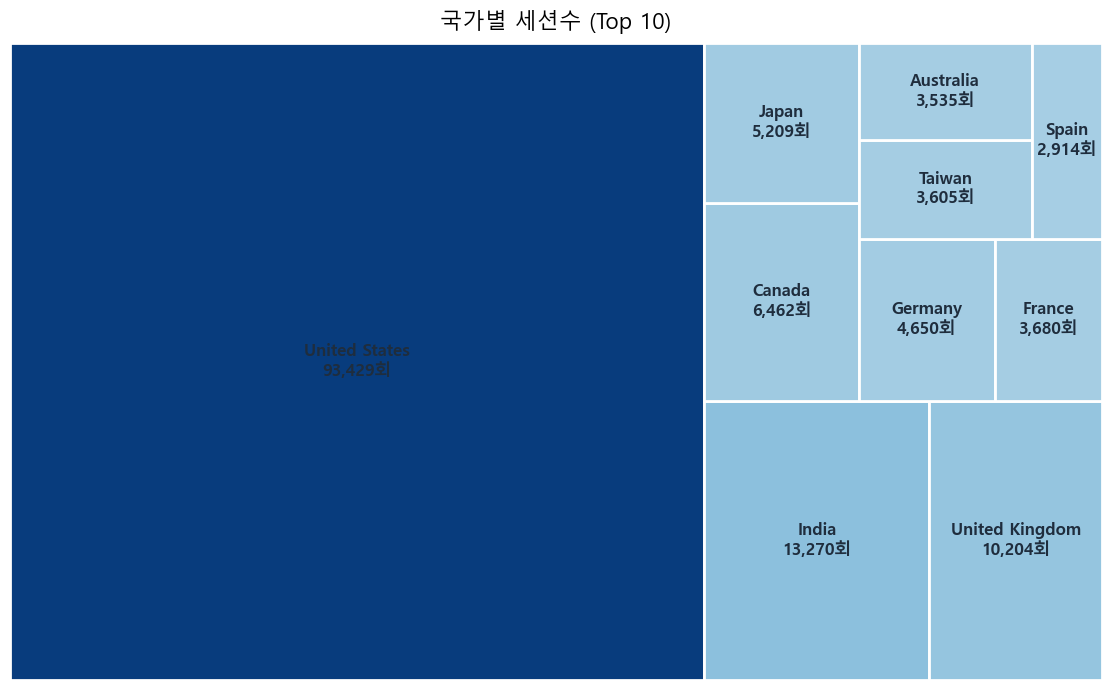

In [17]:
# 이 셀은 국가별 방문 수 Top 10을 트리맵으로 가볍게 시각화하겠습니다.
import squarify

# 데이터프레임에서 시각화 대상을 복사합니다.
plot_df = df_country.copy()

# 국가명이 비어 있으면 '(not set)'으로 채웁니다.
plot_df["country"] = plot_df["country"].fillna("(not set)")

# 값과 라벨을 추출합니다.
values = plot_df["visit_count"].to_numpy(dtype=float)
labels = plot_df["country"].astype(str).tolist()

# 유효한 데이터가 없으면 깔끔히 종료합니다.
if values.size == 0 or np.nansum(values) == 0:
    print("표시할 데이터가 없습니다.")
else:
    # 값의 크기에 따라 파란색 계열로 색을 지정하겠습니다.
    vmin, vmax = np.nanmin(values), np.nanmax(values)
    denom = (vmax - vmin) if vmax != vmin else 1.0
    norm = (values - vmin) / denom
    colors = plt.cm.Blues(0.35 + 0.6 * norm)

    # 트리맵의 사각형 좌표를 계산하겠습니다.
    width, height = 1200, 700
    sizes = squarify.normalize_sizes(values, width, height)
    rects = squarify.squarify(sizes, 0, 0, width, height)

    # 트리맵을 그리겠습니다.
    fig, ax = plt.subplots(figsize=(12, 7))
    area_threshold = (width * height) * 0.012  # 너무 작은 박스는 라벨을 생략하겠습니다.

    for r, c, name, v in zip(rects, colors, labels, values):
        ax.add_patch(plt.Rectangle((r["x"], r["y"]), r["dx"], r["dy"],
                                   facecolor=c, edgecolor="white", linewidth=2))
        area = r["dx"] * r["dy"]
        if area >= area_threshold:
            cx, cy = r["x"] + r["dx"] / 2, r["y"] + r["dy"] / 2
            ax.text(cx, cy, f"{name}\n{int(v):,}회",
                    ha="center", va="center", fontsize=12, fontweight="bold", color="#1f2d3d")

    # 축과 제목을 정리하겠습니다.
    ax.set_xlim(0, width); ax.set_ylim(0, height)
    ax.set_aspect("equal"); ax.axis("off")
    ax.set_title("국가별 세션수 (Top 10)", fontsize=16, pad=10)
    plt.tight_layout()
    plt.show()


**인사이트:**<br>
유입·방문 분석 요약

1) 유입 경로 분석 _(세션 수 기준)_
- **총 세션 수:** **200,761회**
- **최다 유입 경로:**  
  **google (45.37%) > (direct) (39.27%) > youtube.com (4.87%)**
- **해석**
  - google 비중이 가장 높음 → 
  - **(direct)** 유입 다수 → 

---

2) 신규 방문자 vs 재방문자 비율
- **신규 비율이 매우 높음:** `youtube.com (0.94)`, `m.facebook.com (0.93)`
- **재방문 비율이 상대적으로 높음:** `dfa (0.73)`, `sites.google.com (0.65)`
- **해석**
  - YouTube/facebook → 
  - dfa/sites.google.com → 

---

3) 유입 경로별 체류 시간
- **상위 체류 시간:** `dfa (110초) > Partners (109초) > (direct) (108초)`
- **짧은 체류:** `sites.google.com (43초)`
- **해석**
  - dfa/Partners: **리마케팅·제휴 트래픽이 의도 적합** → 

---

4) 방문 매체별 세션 수
- **주요 매체:** `organic, (none), referral`가 **압도적**
- **광고 유입(규모):** `cpc: 5,321`, `cpm: 1,405` _(비중 낮음)_
- **해석**
  - 자연 유입 중심 구조 → 
  - 광고는 

---

5) 국가별 방문자
- **Top 3:** `United States (93,429) > India (13,270) > United Kingdom (10,204)`
- **해석**
  - 미국 비율 **압도적** → 
  - **베트남·태국·일본 등 아시아 유입 존재** →

# 2. Activation (활성화)

: 첫 방문 후 고객이 긍정적인 경험을 했는지 평가. 예를 들어, 회원 가입, 첫 구매, 앱 내 첫 행동 등이 이에 해당 됨.

**사용자들이 우리 서비스의 핵심 기능을 잘 사용하는가?**

예를 들어 쇼핑몰이라면 장바구니 담기, 상세페이지 조회 등이 될 수 있습니다.

만약 이 단계에서 문제가 있다면 서비스의 UX등을 체크해볼 필요가 있겠죠.

**Activation단계의 핵심은 Funnel 분석.**

* 사용자들이 경험하는 단계를 도식화 
* 각 단계의 전환율을 측정/ 분석 

**퍼널 분석(Funnel Analysis)**<br>
퍼널 분석은 사용자가 서비스에 유입되어 최종 전환(Conversion)까지 이어지는 여정을 여러 단계로 나누어 각 단계별 전환율과 이탈률을 측정하는 분석 방법이에요. 이를 통해 어느 지점에서 사용자가 이탈하는지, 어떤 부분에서 개선이 필요한지 파악할 수 있습니다.

목적:
* 병목 구간 식별: 각 단계에서 이탈하는 사용자의 비율을 파악해, 개선해야 할 핵심 구간을 도출.
* 전환율 최적화: 사용자 여정의 각 단계를 개선하여 최종 전환율을 높임으로써 매출 증대.

## 2.1. 단계별 세션 수 파악

In [ ]:
kdf = df

# 집계 대상 코드와 컬럼명을 정의하겠습니다.
codes = ["1", "2", "3", "5", "6"]
colmap = {c: f"action_type_count_{c}" for c in codes}

# 존재하는 컬럼만 합계를 구하고, 없으면 0으로 채우겠습니다.
counts = {c: (kdf[colmap[c]].sum() if colmap[c] in kdf.columns else 0) for c in codes}

# 코드→라벨 매핑을 적용하겠습니다.
action_map = {
    "1": "Product list",
    "2": "Product detail page",
    "3": "Add to cart",
    "5": "Check out",
    "6": "Completed purchase",
}

# 결과 DataFrame으로 정리하고 정렬하겠습니다.
df_funnels = (
    pd.Series(counts).rename_axis("action_code").reset_index(name="count")
)
df_funnels["action"] = df_funnels["action_code"].map(action_map)
df_funnels = df_funnels[["action", "count"]].sort_values("count", ascending=False).reset_index(drop=True)

# 결과를 반환/표시하겠습니다.
df_funnels


,action,count
0,Product list,98499
1,Product detail page,76193
2,Add to cart,30963
3,Check out,21787
4,Completed purchase,6459


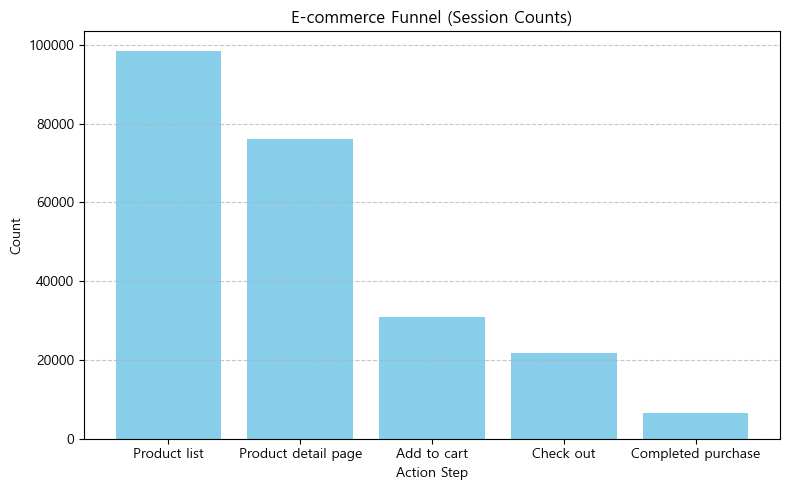

In [19]:
# 데이터가 문자열/범주형이어도 안전하게 표시되도록 라벨을 문자열로 변환하겠습니다.
x = df_funnels["action"].astype(str)
y = df_funnels["count"].astype(float)

# 깔끔한 기본 크기의 캔버스를 만들겠습니다.
plt.figure(figsize=(8, 5))

# 퍼널 단계를 x축, 세션 수를 y축으로 막대를 그리겠습니다.
plt.bar(x, y, color="skyblue")

# 차트 제목과 축 레이블을 읽기 쉽게 붙이겠습니다.
plt.title("E-commerce Funnel (Session Counts)")
plt.xlabel("Action Step")
plt.ylabel("Count")

# 값 비교가 쉽도록 y축에 점선 보조격자를 추가하겠습니다.
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그림을 화면에 출력하겠습니다.
plt.tight_layout()
plt.show()


## 2.2. 전환율, 이탈율 산출

In [ ]:
# 퍼널 단계의 논리적 순서를 명시합니다. 이 순서대로 정렬하고 계산하겠습니다.
order = [
    "Product list",
    "Product detail page",
    "Add to cart",
    "Check out",
    "Completed purchase",
]

# 원본을 순서대로 재배열하고, count를 숫자형으로 강제 변환하겠습니다.
f = (
    df_funnels.set_index("action")
              .***(order)           # order 순으로 다시 재배열!
              .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0))
              .reset_index()
)

# 단계별 전환율을 계산하겠습니다. 앞 단계 대비 다음 단계 비율을 사용합니다.
conv = [100.0]
for i in range(len(order) - 1):
    base = f.loc[i, "count"]
    nxt  = f.loc[i + 1, "count"]
    conv.append(round((nxt / base * 100.0) if base > 0 else 0.0, 2))

# 단계별 전환율과 이탈율을 표에 추가하겠습니다.
f["conversion_rate"] = conv
f["bounce_rate"] = [0.0] + [round(100 - r, 2) for r in conv[1:]]

# 누적 전환율을 계산하겠습니다. 첫 단계 대비 각 단계의 비율을 사용합니다.
first = f.loc[0, "count"]
f["cumulative_conversion"] = (f["count"] / first * 100.0).round(2) if first > 0 else 0.0

# 결과를 df_funnels로 반환하겠습니다.
df_funnels = f
df_funnels

,action,count,conversion_rate,bounce_rate,cumulative_conversion
0,Product list,98499,100.00,0.00,100.00
1,Product detail page,76193,77.35,22.65,77.35
2,Add to cart,30963,40.64,59.36,31.43
3,Check out,21787,70.36,29.64,22.12
4,Completed purchase,6459,29.65,70.35,6.56


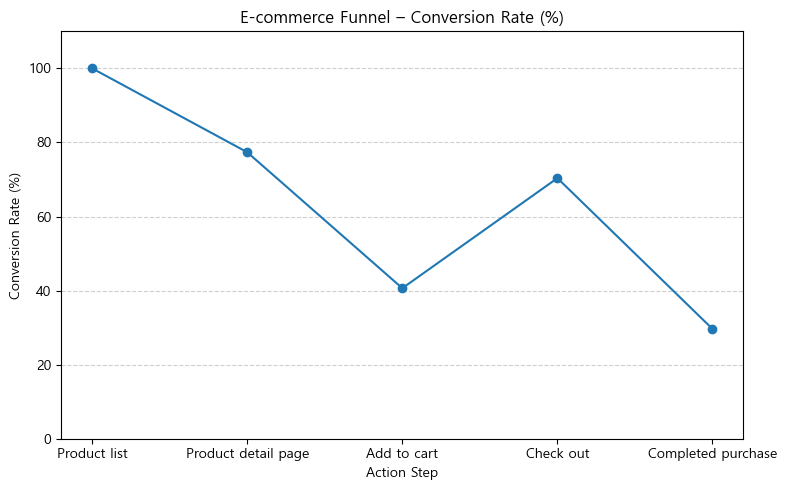

In [21]:
# 퍼널 단계별 전환율을 선 그래프로 확인하겠습니다.
plt.figure(figsize=(8, 5))
plt.plot(df_funnels["action"], df_funnels["conversion_rate"], marker="o")

# 그래프가 무엇을 보여주는지 제목과 축 라벨로 분명히 하겠습니다.
plt.title("E-commerce Funnel – Conversion Rate (%)")
plt.xlabel("Action Step")
plt.ylabel("Conversion Rate (%)")

# 시야를 일정하게 하기 위해 0~110% 범위로 고정하겠습니다.
plt.ylim(0, 110)

# 읽기 쉽게 가로 보조격자를 추가하겠습니다.
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 여백을 자동 조정해 잘림을 방지하겠습니다.
plt.tight_layout()
plt.show()

**인사이트:**

1. 단계별 세션 수
- Product list(목록): 98,499
- Product detail page(상세 페이지): 76,193
- Add to cart(장바구니 담기): 30,963
- Check out(결제 진행): 21,787
- Completed purchase(구매 완료): 6,459

2. 전환율(Conversion Rate) 및 이탈률(Bounce Rate)
- 목록 → 상세 페이지: 전환율 약 77.35%, 이탈률 약 22.65%
- 상세 페이지 → 장바구니 담기: 전환율 약 40.64%, 이탈률 약 59.36%
- 장바구니 담기 → 결제 진행: 전환율 약 70.36%, 이탈률 약 29.64%
- 결제 진행 → 구매 완료: 전환율 약 대략 29.65%, 이탈률 약 70.35%
- 전체 전환율(목록 대비 구매 완료): 약 6.56% (6,459 ÷ 98,499)

단계별 핵심 이슈 및 개선 포인트

1) 목록 → 상세 페이지
- 전환율(77.35%)이 양호한 편이므로, 다른 단계 대비 심각한 병목 구간은 아님
- 이탈 사유: 목록에서 원하는 상품을 찾지 못했거나, 첫인상이 기대에 못 미쳐 이탈
- 개선 방안
  - 썸네일·가격·평점 등 핵심 정보를 직관적으로 노출하여 상세 페이지 유도
  - 

2) 상세 페이지 → 장바구니 담기
- 전환율(40.64%) 낮고 이탈률(59.36%) 큼
- 원인: 상품 정보·가격·후기·배송조건 등으로 구매 의사 형성 부족
- 개선 방안
  - 상세 정보 강화: 이미지/동영상/리뷰/FAQ 확충
  - 가격·혜택 안내: 할인 쿠폰, 프로모션, 적립금 등 동기 유발
  -
  - 

3) 장바구니 담기 → 결제 진행
- 전환율 70.36%로 비교적 양호하나, 29.64%는 결제로 이동하지 않음
- 원인: 추가 담기 의도, 나중 결제 의도 등
- 개선 방안
  - 장바구니 UX: 합산 금액, 배송비, 예상 배송일 명확화
  - 

4) 결제 진행 → 구매 완료
- 이탈률 70.35%로 최대 병목
- 원인: 결제 수단 부족, 복잡한 프로세스, 추가 비용 노출, 쿠폰 적용 문제 등
- 개선 방안
  - 결제 과정 단순화: 간편결제(PG) 도입, 단계 축소
  - 사례: 쿠팡의 바로결제(밀어서 결제)처럼 결제 단계를 대폭 축소
  - 
  - 

우선순위 및 액션 아이템
1) 결제 진행 → 구매 완료 전환율 개선
- 가장 큰 이탈(70.35%) 구간
- 결제 과정 단순화, 에러/이탈 방지, 이탈 리마인드 등 결제 페이지 전면 개선
- 결제 도중 이탈 시 재접속 유도(리마인드, 할인 쿠폰)

2) 상세 페이지 → 장바구니 담기 전환율 개선
- A/B 테스트로 상세 페이지 구성·버튼 위치/디자인 최적화
- 할인 쿠폰, 프로모션, 적립금 등 구매 동기 강화

3) 기타
- 목록 → 상세 구간에서 썸네일 등 홍보 요소를 보강하되 과도한 자극은 지양
- 장바구니 이탈 방지 전략 실행

종합 요약
- ~~~
- ~~~
- ~~~

# 3. Retention(유지)

: 고객이 제품이나 서비스를 반복적으로 이용하는지를 측정. 즉, 초기 경험 후 얼마나 많은 고객이 돌아오는지를 분석.

**사용자가 우리 서비스에 지속적으로 방문하는가?** 

Active 과정을 통해 경험한 핵심가치를 꾸준히 경험하게 하고, 그 수준을 측정할 수 있는 지표를 정의하고 관리하는 단계.

**Retention단계의 핵심은 코호트 분석(Cohort Analysis).**

* 특정 기간이나 기준에 따라 사용자 집단(코호트)을 나누어, 이들이 시간에 따라 어떻게 행동하는지 분석하는 기법이에요.
* 단순한 전체 평균 지표만으로는 파악하기 어려운 사용자 행동의 세부 패턴을 드러낸다.
* 각 그룹의 재방문율을 분석함으로써 Retention 단계에서의 문제점을 도출하고 개선할 수 있어요.

**코호트 분석(Cohort Analysis)**

GA 데이터에서 최초 유입 시점을 기준으로 사용자를 그룹화한 뒤, 일정 기간 동안 얼마만큼의 사용자가 재방문하는지를 추적하고, 채널별 코호트 비교를 통해 어떤 유입 경로가 장기적으로 더 효과적인지 분석해 보겠습니다.

## 3.1. 목표 변수 생성
* `first_visit_week`: 첫 구매 주간
* `week_passed`: 사용자 별 첫 구매주부터 데이터의 마지막 날짜인 2017년 7월까지의 차이
* `customer_count`: 각 조건에 해당하는 고객의 수

In [ ]:
UID_COL  = "fullVisitorId"
DATE_END = pd.to_datetime("2017-07-31")  # 데이터의 마지막 날짜를 명시합니다.

# 원본을 보존하기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# YYYYMMDD를 일 단위 datetime으로 안전하게 변환하겠습니다.
kdf["_session_day"] = pd.to_datetime(
    kdf["date"].astype(str), format="%Y%m%d", errors="coerce"
).dt.normalize()

# 모든 날짜를 그 주의 '월요일'로 스냅시켜 주차 시작일을 강제하겠습니다.
kdf["_session_week"] = kdf["_session_day"] - pd.to_timedelta(
    kdf["_session_day"].dt.weekday, unit="D"
)

# 사용자별로 최초 방문 주(월요일 시작)를 구하겠습니다.
kdf["first_visit_week"] = kdf.***(***)["_session_week"].transform("min")

# 마지막 부분 코호트(2017-07-31 시작 주)를 분석에서 제외하겠습니다.
last_anchor = DATE_END - pd.to_timedelta(DATE_END.weekday(), unit="D")
kdf = kdf[kdf["first_visit_week"] != last_anchor].copy()

# 최초 주로부터 경과 주차를 정수로 계산하고 음수는 방어적으로 제거하겠습니다.
kdf["week_passed"] = ((kdf["_session_week"] - kdf["first_visit_week"])
                      .dt.days // 7).astype(int)
kdf = kdf[kdf["week_passed"] >= 0].copy()

# (최초 주 × 경과 주) 기준의 유니크 사용자 수 코호트 매트릭스를 만들겠습니다.
cohort = (
    kdf.***(["***", "***"])[UID_COL]
       .***()
       .reset_index(name="customer_count")
       .sort_values(["first_visit_week", "week_passed"])
)

# 시작/종료 코호트만 간단히 확인하겠습니다.
print("first cohort:", cohort["first_visit_week"].min().date())
print("last  cohort:", cohort["first_visit_week"].max().date(), "(excluded:", last_anchor.date(), ")")

# 필요 시 미리보기를 확인하겠습니다.
display(cohort.head(10))

first cohort: 2017-05-01
last  cohort: 2017-07-24 (excluded: 2017-07-31 )


,first_visit_week,week_passed,customer_count
0,2017-05-01,0,13065
1,2017-05-01,1,596
2,2017-05-01,2,404
3,2017-05-01,3,277
4,2017-05-01,4,222
5,2017-05-01,5,174
6,2017-05-01,6,146
7,2017-05-01,7,116
8,2017-05-01,8,122
9,2017-05-01,9,82


## 3.2. 피벗 테이블 생성

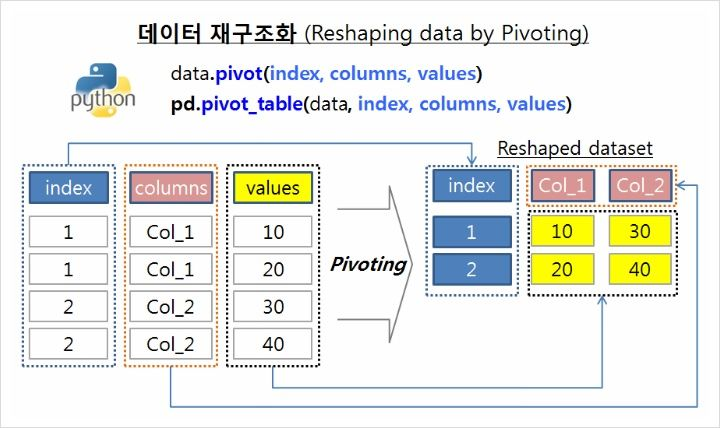

`.pivot()`메서드는 데이터의 열을 기준으로 피벗테이블로 변환시키는 메서드 입니다.

`df.pivot(index=None, columns=None, values=None)`<br>

**index**: 인덱스로 사용될 열입니다.<br>
**columns**: 열로 사용될 열 입니다.<br>
**values**: 값으로 입력될 열 입니다.<br>
※ index나 columns에 리스트를 입력 할 경우 멀티 인덱스로 피벗테이블이 생성됩니다.<br>
values에 리스트를 입력 할 경우 각 값에 대한 테이블이 연속적으로 생성됩니다.

In [23]:
# 코호트×경과주 피벗 (고객 수)
p_count = (
    cohort.pivot(index="first_visit_week", columns="week_passed", values="customer_count")
          .fillna(0)
          .astype(int)
          .sort_index()
          .reindex(sorted(cohort["week_passed"].unique()), axis=1)
)

p_count

week_passed,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_visit_week,,,,,,,,,,,,,,
2017-05-01,13065,596,404,277,222,174,146,116,122,82,92,97,83,30
2017-05-08,10249,471,246,183,142,120,83,92,60,73,55,47,10,0
2017-05-15,13196,487,250,233,145,100,77,51,55,50,44,11,0,0
2017-05-22,10859,410,237,174,130,96,48,79,57,55,11,0,0,0
2017-05-29,11245,405,198,147,119,67,69,60,44,7,0,0,0,0
2017-06-05,11143,395,190,149,103,91,77,70,17,0,0,0,0,0
2017-06-12,11000,381,190,137,111,81,72,17,0,0,0,0,0,0
2017-06-19,10984,338,172,170,146,87,15,0,0,0,0,0,0,0
2017-06-26,13603,338,203,155,119,30,0,0,0,0,0,0,0,0


## 3.3. 비율로 변환

In [24]:
# 0주차 컬럼이 있는지 확인합니다. 없다면 피벗 단계에서 week_passed=0 포함 여부를 점검합니다.
if 0 not in p_count.columns:
    raise ValueError("p_count에 0주차(열=0)가 없습니다. pivot 단계에서 week_passed=0이 포함되었는지 확인하세요.")

# 각 코호트의 0주차를 분모로 하여 리텐션(%)을 계산합니다.
denom = p_count[0].replace(0, np.nan)                 # 0으로 나누는 상황을 피합니다.
retention_pct = (p_count.div(denom, axis=0) * 100).round(1)

# 코호트 시작 주 인덱스를 YYYY-MM-DD 문자열로 보기 좋게 바꿉니다.
idx_fmt = pd.to_datetime(p_count.index).strftime("%Y-%m-%d")
p_count.index = idx_fmt
retention_pct.index = idx_fmt

# 결과를 일부만 확인합니다.
print("▶ Cohort Counts:\n", p_count.head())
print("\n▶ Retention (%):\n", retention_pct.head())


▶ Cohort Counts:
 week_passed          0    1    2    3    4    5    6    7    8   9   10  11  \
first_visit_week                                                              
2017-05-01        13065  596  404  277  222  174  146  116  122  82  92  97   
2017-05-08        10249  471  246  183  142  120   83   92   60  73  55  47   
2017-05-15        13196  487  250  233  145  100   77   51   55  50  44  11   
2017-05-22        10859  410  237  174  130   96   48   79   57  55  11   0   
2017-05-29        11245  405  198  147  119   67   69   60   44   7   0   0   

week_passed       12  13  
first_visit_week          
2017-05-01        83  30  
2017-05-08        10   0  
2017-05-15         0   0  
2017-05-22         0   0  
2017-05-29         0   0  

▶ Retention (%):
 week_passed          0    1    2    3    4    5    6    7    8    9    10  \
first_visit_week                                                            
2017-05-01        100.0  4.6  3.1  2.1  1.7  1.3  1.1  0.9  0.9  0

## 3.4. 히트맵으로 시각화

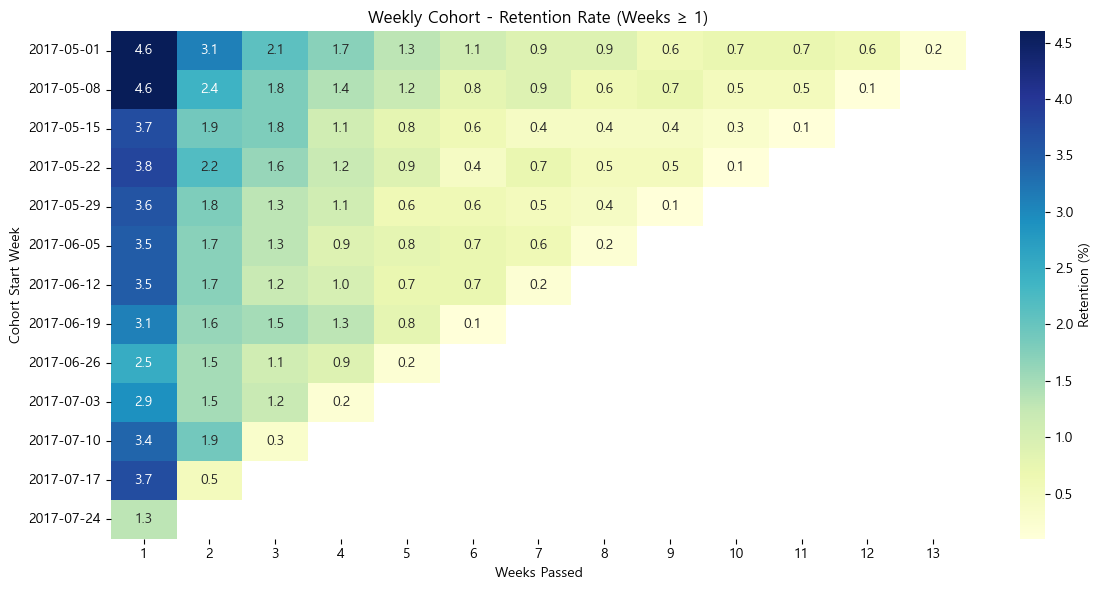

In [25]:
# 주차 1 이상만 선택합니다. (열 이름이 정수인 것만 안전하게 추립니다.)
cols = sorted([c for c in retention_pct.columns if isinstance(c, (int, np.integer)) and c >= 1])
ret_1p = retention_pct[cols]

# 0 또는 NaN을 가리는 마스크 생성
mask = ret_1p.isna() | (ret_1p == 0)

plt.figure(figsize=(12, 6))
sns.heatmap(
    ret_1p,
    annot=True, fmt=".1f",
    cmap="YlGnBu",
    mask=mask,
    cbar_kws={'label': 'Retention (%)'}
)
plt.title("Weekly Cohort - Retention Rate (Weeks ≥ 1)")
plt.ylabel("Cohort Start Week")
plt.xlabel("Weeks Passed")
plt.tight_layout()
plt.show()

여기서, 06월 26일 주간 코호트의 첫 주차 리텐션율은 2.5%로 다른 코호트 대비 낮은 것을 확인할 수 있는데, 그 원인이 무엇일지 추측해봅시다.

먼저, 각 유입 경로, 방문 매체, 캠페인별로 재방문율을 측정해보며 큰 그림을 볼게요.

그 다음 06월 26일 주간 코호트의 유입 경로나 방문 매체 등 각 집단의 세션 수를 측정하여 다른 코호트와의 차이점을 확인해보겠습니다.

## 3.5. 유입 경로, 방문 매체, 캠페인별 재방문율

### (1) 유입 경로

In [ ]:
# 복사본에서 작업합니다.
kdf = df.copy()

# 날짜를 datetime으로 변환합니다.
kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce")

# 사용자별 첫 세션의 소스를 뽑습니다(시간순으로 정렬 후 첫 행을 사용).
first_src = (
    kdf.***(["fullVisitorId", "_day"])      # 정렬해줘야 될 것 같은데...! 정렬해주는 메소드는 뭐였죠?
       .drop_duplicates("fullVisitorId", keep="first")[["fullVisitorId", "trafficSource.source"]]
       .rename(columns={"trafficSource.source": "source"})
)

# 사용자별 세션 수를 계산합니다.
sess_cnt = (
    kdf.groupby("fullVisitorId", as_index=False)
       .size()
       .rename(columns={"size": "session_count"})
)

# 첫 소스와 세션 수를 합칩니다.
user_df = first_src.merge(sess_cnt, on="fullVisitorId", how="left")

# 소스별 사용자 수와 재방문자 수(세션 2회 이상)를 집계합니다.
agg = (
    user_df.groupby("source", dropna=False)
           .agg(
               total_users=("fullVisitorId", "nunique"),
               retained_users=("session_count", lambda s: (s > 1).sum())
           )
           .reset_index()
)

# 소스별 리텐션율을 계산하고 상위만 정렬해 봅니다.
agg["retention_rate"] = (agg["retained_users"] / agg["total_users"]).round(2)
agg = agg.sort_values(["total_users", "retention_rate"], ascending=[False, False]).head(50)

# 결과를 확인합니다.
agg.head(10)


,source,total_users,retained_users,retention_rate
39,google,74275,9607,0.13
0,(direct),58958,10736,0.18
141,youtube.com,9109,422,0.05
6,analytics.google.com,3693,719,0.19
2,Partners,3402,584,0.17
83,m.facebook.com,1506,95,0.06
51,google.com,1016,88,0.09
12,baidu,468,25,0.05
132,t.co,440,30,0.07
112,qiita.com,425,42,0.10


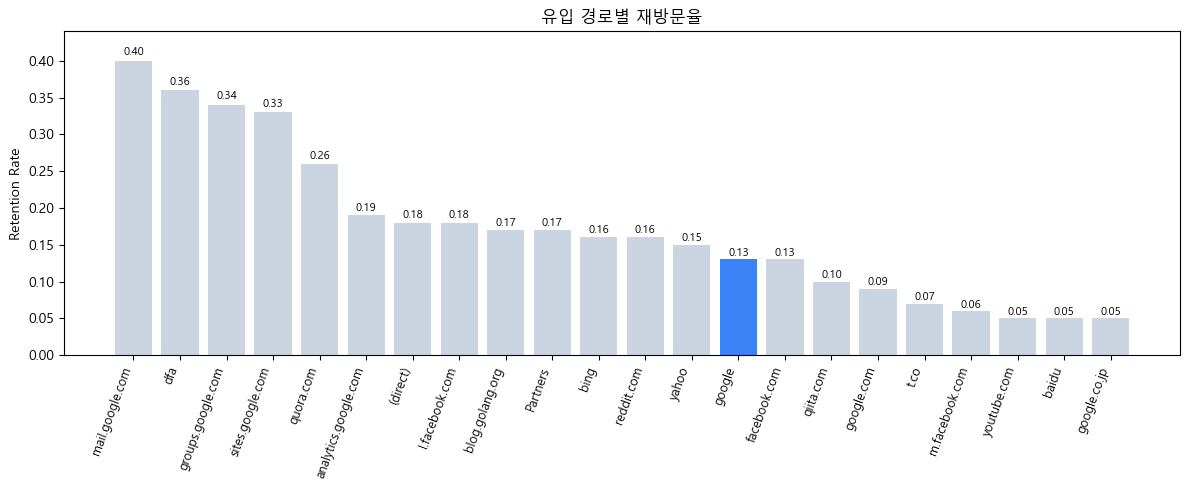

In [27]:
# 소스별 재방문율 막대차트를 가장 가볍게 그립니다.

# 최소 사용자 수 기준으로 소스를 걸러서 표본이 너무 작은 경우를 줄입니다.
min_users = 100
plot_df = (
    agg.query("total_users >= @min_users")
       .sort_values("retention_rate", ascending=False)
       .reset_index(drop=True)
)

# 강조하고 싶은 소스를 한 가지 지정합니다(없으면 None으로 둡니다).
highlight_source = "google"

# 기본 막대차트를 그립니다. 강조 대상만 색을 다르게 표시합니다.
plt.figure(figsize=(12, 5))
colors = np.where(plot_df["source"].eq(highlight_source), "#3b82f6", "#cbd5e1")
bars = plt.bar(np.arange(len(plot_df)), plot_df["retention_rate"].values, color=colors)

# 축과 레이블을 간단히 설정합니다.
plt.title("유입 경로별 재방문율")
plt.ylabel("Retention Rate")
plt.xticks(np.arange(len(plot_df)), plot_df["source"], rotation=70, ha="right", fontsize=9)

# 각 막대 위에 값을 간단히 표시합니다.
ymax = float(plot_df["retention_rate"].max()) * 1.1 if len(plot_df) else 1.0
plt.ylim(0, ymax)
for rect, val in zip(bars, plot_df["retention_rate"].values):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height()*1.01, f"{val:.2f}",
             ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

유입 경로별 재방문율은 위 그래프와 같고, 가장 높은 세션 수를 보유한 google의 재방문율은 약 13%로 다른 유입 경로와 비교했을 때, 중간 수준의 재방문율을 보인다.

### (2) 방문 매체

In [ ]:
# 매체별 재방문율을 계산해볼까요?

# 원본을 보존하기 위해 복사본에서 작업합니다.
kdf = df.copy()

# 사용자×매체 조합별 세션 수를 셉니다.
user_sessions = (
    kdf.***(["***", "***"], dropna=False)
       .size()
       .reset_index(name="session_count")
       .rename(columns={"trafficSource.medium": "medium"})
)

# 매체별로 고유 사용자 수와 재방문 사용자 수를 집계합니다.
df_rtn_med = (
    user_sessions.groupby("medium", dropna=False)
      .agg(
          total_users=("fullVisitorId", "nunique"),
          retained_users=("session_count", lambda s: (s > 1).sum())
      )
      .assign(retention_rate=lambda d: (d["retained_users"] / d["total_users"]).round(2))
      .sort_values(["total_users", "retention_rate"], ascending=[False, False])
      .reset_index()
)

df_rtn_med

,medium,total_users,retained_users,retention_rate
0,organic,73701,7728,0.10
1,(none),60716,9733,0.16
2,referral,20845,1874,0.09
3,cpc,4201,649,0.15
4,affiliate,3652,477,0.13
5,cpm,964,221,0.23
6,(not set),5,1,0.20


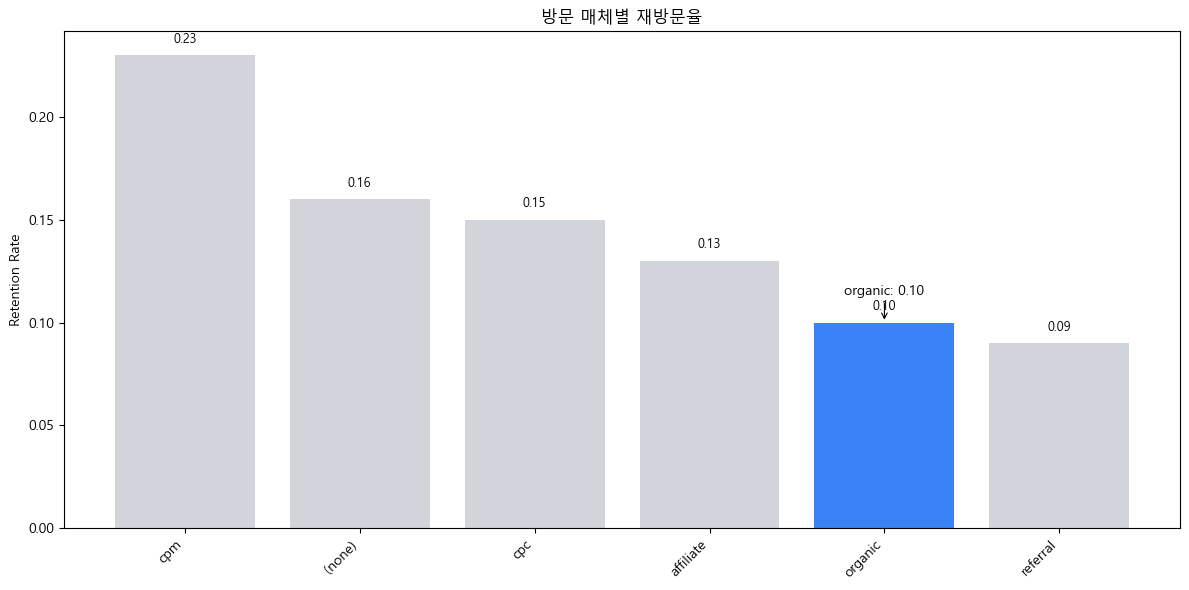

In [29]:
# 매체별 재방문율을 막대그래프로 보겠습니다.

# 최소 사용자 수 기준으로 작은 집단을 제거하겠습니다.
min_users = 100
plot_df = (
    df_rtn_med.query("total_users >= @min_users")
              .sort_values("retention_rate", ascending=False)
              .reset_index(drop=True)
)

# 강조할 매체를 하나 선택하겠습니다.
highlight_medium = "organic"

# 막대를 그리기 위한 위치와 값을 준비하겠습니다.
x = np.arange(len(plot_df))
y = plot_df["retention_rate"].values

# 강조 매체는 진한 색, 나머지는 연한 색으로 표시하겠습니다.
colors = np.where(plot_df["medium"].eq(highlight_medium), "#3b82f6", "#d1d5db")

# 막대 차트를 그리겠습니다.
plt.figure(figsize=(12, 6))
bars = plt.bar(x, y, color=colors)

# x축에 매체 이름을 표시하겠습니다.
plt.xticks(x, plot_df["medium"], rotation=45, ha="right")
plt.ylabel("Retention Rate")
plt.title("방문 매체별 재방문율")

# 막대 위에 값을 간단히 표기하겠습니다.
ymax = float(y.max()) if len(y) else 0.0
for rect, val in zip(bars, y):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height() + ymax*0.02,
             f"{val:.2f}", ha="center", va="bottom", fontsize=9)

# 강조 매체가 있으면 간단히 주석으로 표시하겠습니다.
if highlight_medium in plot_df["medium"].values:
    idx = int(plot_df.index[plot_df["medium"].eq(highlight_medium)][0])
    rect = bars[idx]
    plt.annotate(
        f"{highlight_medium}: {plot_df.loc[idx, 'retention_rate']:.2f}",
        xy=(rect.get_x() + rect.get_width()/2, rect.get_height()),
        xytext=(0, 18),
        textcoords="offset points",
        ha="center", va="bottom",
        arrowprops=dict(arrowstyle="->", lw=0.8)
    )

plt.tight_layout()
plt.show()

가장 높은 세션을 보유한 organic은 약 10%로 다른 방문 매체에 비해 상대적으로 낮은 재방문율을 보인다.

### (3) 캠페인

In [ ]:
# 캠페인별 재방문율을 계산해보겠습니다.

# 원본을 건드리지 않기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 날짜는 YYYYMMDD 형식을 안전하게 datetime으로 바꾸고, 하루 단위 비교를 위해 자정을 기준으로 맞추겠습니다.
kdf["_session_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()

# 사용자별 최초 세션 순서대로 정렬해서 대표 캠페인을 뽑아보겠습니다.
kdf = kdf.***(["fullVisitorId", "_session_day"]) # 정렬하는 메소드! 방금도 쓴 것 같은데...?

# 각 사용자 안에서 결측이 아닌 첫 캠페인을 대표 캠페인으로 정하고, 모두 결측이면 (none)으로 치환하겠습니다.
first_campaign = (
    kdf.groupby("fullVisitorId")["trafficSource.campaign"]
       .apply(lambda s: s.dropna().iloc[0] if not s.dropna().empty else "(none)")
       .rename("campaign")
)

# 동시에 사용자별 세션 수(방문 횟수)를 세어 재방문 여부를 판단하겠습니다.
session_count = kdf.groupby("fullVisitorId").size().rename("session_count")

# 대표 캠페인과 세션 수를 사용자 단위로 합치겠습니다.
user_sessions = pd.concat([first_campaign, session_count], axis=1).reset_index()

# 캠페인별로 사용자 수와 재방문 사용자를 집계하고 재방문율을 계산하겠습니다.
df_rtn_cpn = (
    user_sessions.groupby("campaign", dropna=False)
        .agg(
            total_users=("fullVisitorId", "nunique"),
            retained_users=("session_count", lambda s: (s > 1).sum())
        )
        .assign(retention_rate=lambda d: (d["retained_users"] / d["total_users"]).round(2))
        .sort_values(["total_users", "retention_rate"], ascending=[False, False])
        .reset_index()
)

# 상위 10개만 미리 보겠습니다.
df_rtn_cpn.head(10)


,campaign,total_users,retained_users,retention_rate
0,(not set),150805,21753,0.14
1,Data Share Promo,3402,584,0.17
2,AW - Accessories,2149,468,0.22
3,AW - Dynamic Search Ads Whole Site,1360,423,0.31
4,AW - Apparel,20,4,0.20
5,AW - Electronics,2,0,0.00


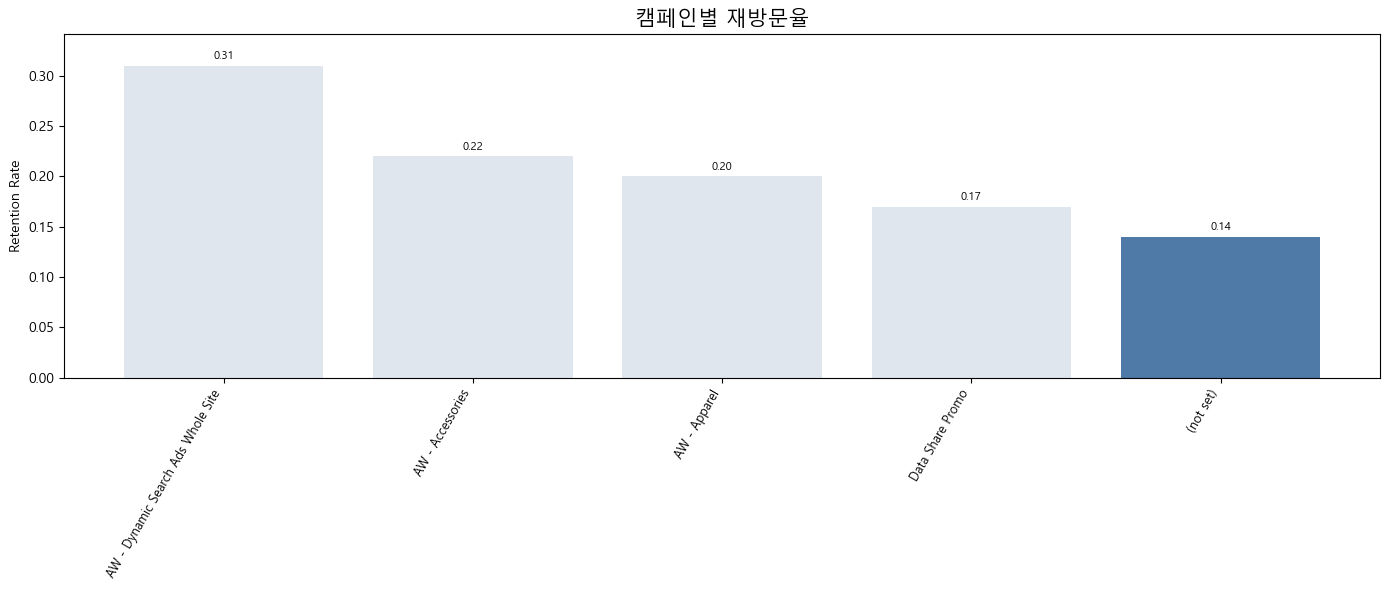

In [31]:
# 캠페인별 재방문율을 막대그래프로 볼게요.
# 우리는 작은 집단의 노이즈를 줄이기 위해 최소 사용자 수로 필터링하겠습니다.

min_users = 10  # 최소 사용자 수 기준입니다.
plot_df = (
    df_rtn_cpn.query("total_users >= @min_users")
              .sort_values("retention_rate", ascending=False)
              .reset_index(drop=True)
)

# 우리는 특정 캠페인을 눈에 띄게 하려고 하이라이트 대상을 하나 정하겠습니다.
highlight_campaign = "(not set)"

# 우리는 하이라이트 대상은 진한 색, 나머지는 연한 색으로 구분해서 가독성을 높이겠습니다.
colors = np.where(plot_df["campaign"].eq(highlight_campaign), "#4f79a7", "#dfe6ee")

# 우리는 막대그래프를 그려서 캠페인별 재방문율을 한눈에 보이게 하겠습니다.
plt.figure(figsize=(14, 6))
ax = plt.gca()
bars = ax.bar(np.arange(len(plot_df)), plot_df["retention_rate"].values, color=colors)

# 우리는 축과 레이블을 간결하게 표시하겠습니다.
ax.set_title("캠페인별 재방문율", fontsize=15)
ax.set_ylabel("Retention Rate")
ax.set_xticks(np.arange(len(plot_df)))
ax.set_xticklabels(plot_df["campaign"], rotation=60, ha="right", fontsize=9)

# 우리는 상단이 잘리지 않도록 여유를 두겠습니다.
ymax = float(plot_df["retention_rate"].max()) * 1.1 if len(plot_df) else 1.0
ax.set_ylim(0, ymax)

# 우리는 각 막대 위에 값을 간단히 표시하겠습니다.
for rect, val in zip(bars, plot_df["retention_rate"].values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + ymax*0.01,
            f"{val:.2f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

(not set)의 경우 약 14%로 다른 캠페인에 비해 낮은 재방문율을 보인다.

## 3.6. 주간별 유입 경로, 방문 매체, 캠페인 확인

### (1) 유입 경로

In [32]:
# === Sessions by Week x Source (All Sessions, Monday anchor, 2017-05-01 ~ 2017-07-30) ===

# 복사본에서 작업하여 원본을 보호하겠습니다.
kdf = df.copy()

# 날짜를 안전하게 일 단위로 변환하고 분석 구간(5/1~7/30)에 맞춰 필터링하겠습니다.
kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf[(kdf["_day"] >= "2017-05-01") & (kdf["_day"] <= "2017-07-30")].copy()

# 모든 날짜를 해당 주의 월요일로 스냅하여 주 시작일을 만들겠습니다.
kdf["_week_start"] = kdf["_day"] - pd.to_timedelta(kdf["_day"].dt.weekday, unit="D")

# 소스 컬럼 이름을 정리하겠습니다.
src_col = "trafficSource.source" if "trafficSource.source" in kdf.columns else "source"

# visitId가 있으면 고유 세션 수를, 없으면 행 개수로 세션 수를 집계하겠습니다.
if {"fullVisitorId", "visitId"}.issubset(kdf.columns):
    kdf["_session_key"] = kdf["fullVisitorId"].astype(str) + "-" + kdf["visitId"].astype(str)
    df_inf = (
        kdf.groupby(["_week_start", src_col], dropna=False)["_session_key"]
           .nunique()
           .reset_index(name="visit_count")
           .rename(columns={src_col: "_source"})
           .sort_values(["_week_start", "visit_count"], ascending=[True, False])
    )
else:
    df_inf = (
        kdf.groupby(["_week_start", src_col], dropna=False)
           .size()
           .reset_index(name="visit_count")
           .rename(columns={src_col: "_source"})
           .sort_values(["_week_start", "visit_count"], ascending=[True, False])
    )

# 보기 좋은 주차 라벨을 추가하겠습니다.
df_inf["week"] = pd.to_datetime(df_inf["_week_start"]).dt.strftime("%Y-%m-%d")

# 결과를 간단히 미리 보겠습니다.
display(df_inf.head(10))

,_week_start,_source,visit_count,week
21,2017-05-01,google,7569,2017-05-01
0,2017-05-01,(direct),4109,2017-05-01
61,2017-05-01,youtube.com,1251,2017-05-01
38,2017-05-01,m.facebook.com,532,2017-05-01
3,2017-05-01,analytics.google.com,347,2017-05-01
2,2017-05-01,Partners,289,2017-05-01
56,2017-05-01,t.co,227,2017-05-01
31,2017-05-01,groups.google.com,159,2017-05-01
16,2017-05-01,facebook.com,126,2017-05-01
12,2017-05-01,dfa,105,2017-05-01


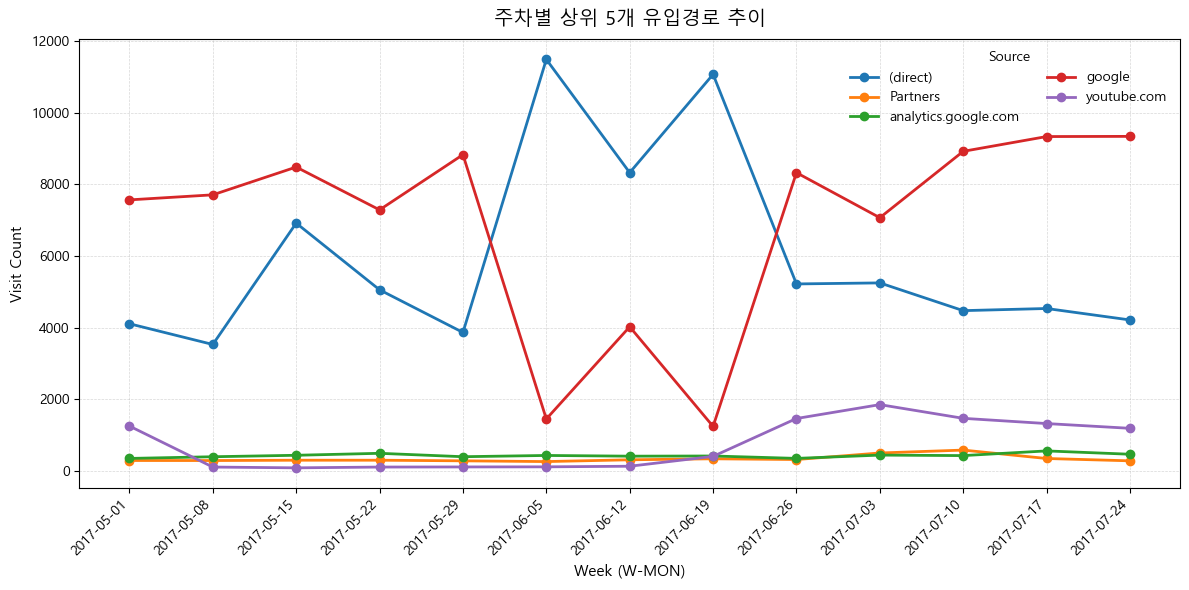

In [33]:
# 기간 전체에서 유입경로별 방문수를 합산해 상위 5개를 고르겠습니다.
top5 = (
    df_inf.groupby("_source")["visit_count"].sum()
          .nlargest(5).index.tolist()
)

# 상위 5개 유입경로만 남기고 주차×소스 피벗을 만들겠습니다.
pivot = (
    df_inf[df_inf["_source"].isin(top5)]
      .pivot(index="week", columns="_source", values="visit_count")
      .fillna(0)
      .sort_index()
)

# 주차별 상위 5개 유입경로의 추이를 라인 차트로 보이겠습니다.
plt.figure(figsize=(12, 6))
ax = plt.gca()
for col in pivot.columns:
    ax.plot(pivot.index, pivot[col].values, marker="o", linewidth=2, label=col)

ax.set_title("주차별 상위 5개 유입경로 추이", fontsize=14, pad=10)
ax.set_xlabel("Week (W-MON)", fontsize=11)   # 월요일 시작 주차 라벨입니다.
ax.set_ylabel("Visit Count", fontsize=11)

ax.set_xticks(list(pivot.index))
ax.set_xticklabels(pd.to_datetime(pivot.index).strftime("%Y-%m-%d"),
                   rotation=45, ha="right")

ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
ax.legend(title="Source", ncol=2, frameon=False)
plt.tight_layout()
plt.show()

### (2) 방문 매체

In [34]:
# 날짜를 일 단위로 파싱해서 주(월요일 시작)로 스냅하겠습니다.
kdf = df.copy()

kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf.dropna(subset=["_day"])
kdf["_week_start"] = kdf["_day"] - pd.to_timedelta(kdf["_day"].dt.weekday, unit="D")  # 월요일로 정렬

# 마지막 부분 주(2017-07-31 시작)는 분석에서 제외하겠습니다.
last_anchor = pd.to_datetime("2017-07-31")
kdf = kdf[kdf["_week_start"] != last_anchor]

# 주차 × 유입 매체별 세션 수를 집계하겠습니다.
df_med = (
    kdf.groupby(["_week_start", "trafficSource.medium"], dropna=False)
       .size()
       .reset_index(name="visit_count")
       .rename(columns={"trafficSource.medium": "medium"})
       .sort_values(["_week_start", "visit_count"], ascending=[True, False])
       .reset_index(drop=True)
)

# 주차 라벨은 보기 좋게 YYYY-MM-DD 문자열로 바꾸겠습니다.
df_med["_week"] = df_med["_week_start"].dt.strftime("%Y-%m-%d")

# 미리보기를 확인하겠습니다.
df_med.head(20)

,_week_start,medium,visit_count,_week
0,2017-05-01,organic,7297,2017-05-01
1,2017-05-01,(none),4109,2017-05-01
2,2017-05-01,referral,3109,2017-05-01
3,2017-05-01,cpc,378,2017-05-01
4,2017-05-01,affiliate,289,2017-05-01
5,2017-05-01,cpm,105,2017-05-01
6,2017-05-01,(not set),2,2017-05-01
7,2017-05-08,organic,7434,2017-05-08
8,2017-05-08,(none),3530,2017-05-08
9,2017-05-08,referral,1170,2017-05-08


C:\Users\Allen\AppData\Local\Temp\ipykernel_27452\3667579740.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20", len(top_mediums))


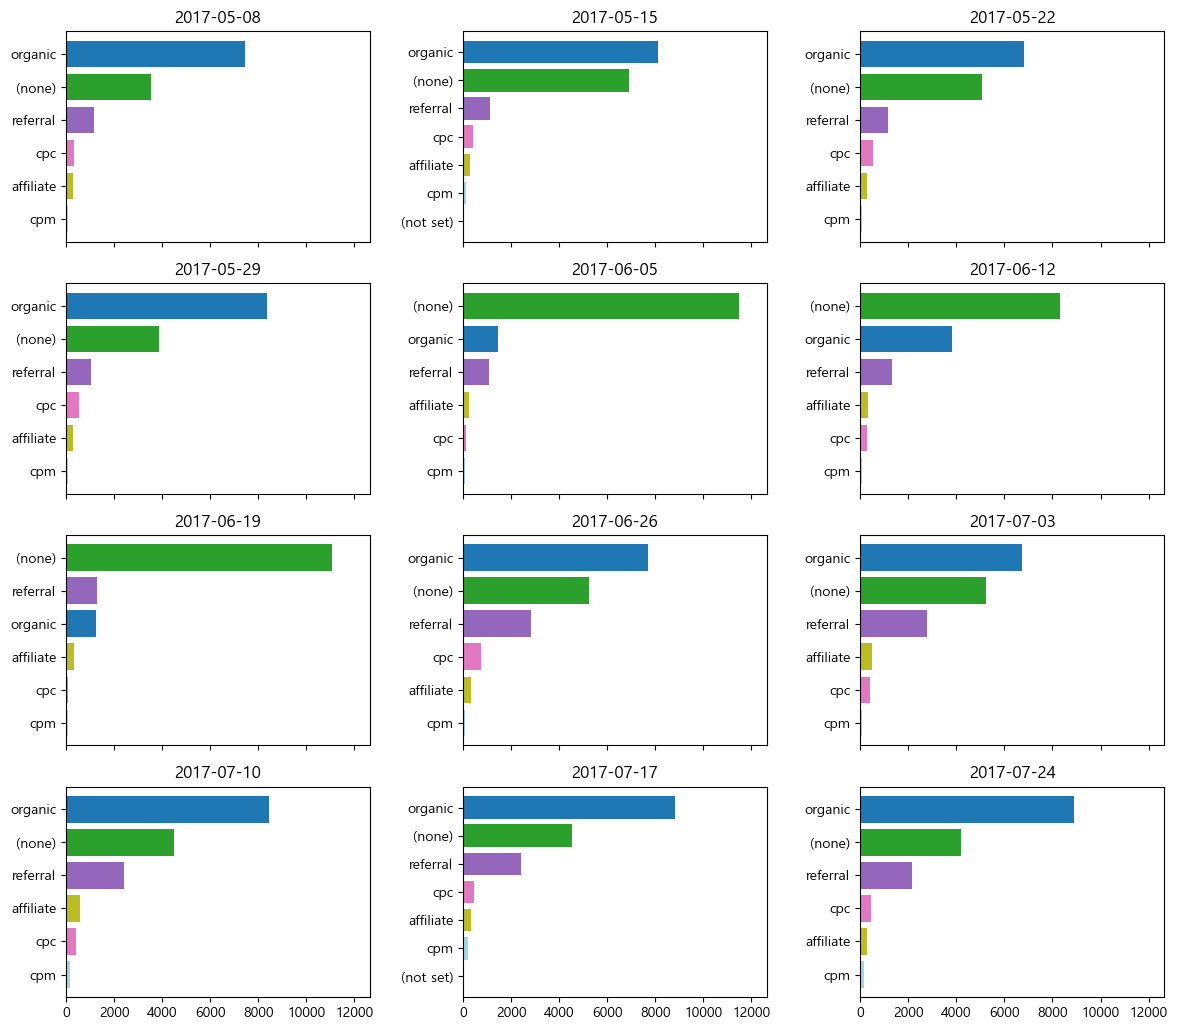

In [35]:
# 최근 N개 주차만 사용하겠습니다.
N_WEEKS = 12

# 주차 라벨을 시간순으로 정리하고 최근 N개만 추출하겠습니다.
weeks = (
    pd.to_datetime(df_med["_week"]).sort_values().drop_duplicates()
      .dt.strftime("%Y-%m-%d").tolist()
)[-N_WEEKS:]

# 선택한 주차 데이터만 남기고 정렬하겠습니다.
plot_df = (
    df_med[df_med["_week"].isin(weeks)]
      .sort_values(["_week", "visit_count"], ascending=[True, False])
      .reset_index(drop=True)
)

# 상위 K개 매체에만 고정 색을 두고 나머지는 기본 색으로 처리하겠습니다.
TOP_K = 6
from matplotlib.cm import get_cmap
top_mediums = plot_df.groupby("medium")["visit_count"].sum().nlargest(TOP_K).index.tolist()
cmap = get_cmap("tab20", len(top_mediums))
color_map = {m: cmap(i) for i, m in enumerate(top_mediums)}
default_color = (0.88, 0.92, 0.98, 1.0)

def pick_color(m):  # 상위 매체면 고정 색을, 아니면 기본 색을 쓰겠습니다.
    return color_map.get(m, default_color)

# 과도한 항목은 Others로 묶어 가독성을 확보하겠습니다.
MAX_BARS = 7

# 소형 멀티플롯을 구성하겠습니다.
import math, matplotlib.pyplot as plt
NCOLS = 3
n = len(weeks)
nrows = max(1, math.ceil(n / NCOLS))
fig, axes = plt.subplots(nrows=nrows, ncols=NCOLS, sharex=True, figsize=(12, 2.6*nrows))
axes = axes.ravel() if n > 1 else [axes]

# 주차별로 간단한 가로 막대를 그리겠습니다.
xmax = float(plot_df["visit_count"].max()) * 1.1 if len(plot_df) else 1.0
for ax, wk in zip(axes, weeks):
    wdf = plot_df[plot_df["_week"] == wk].copy()
    if len(wdf) > MAX_BARS:  # 너무 많은 매체는 Others로 묶겠습니다.
        head = wdf.head(MAX_BARS - 1)
        others = pd.DataFrame([{"_week": wk, "medium": "Others",
                                "visit_count": wdf["visit_count"].iloc[MAX_BARS-1:].sum()}])
        wdf = pd.concat([head, others], ignore_index=True)
    wdf = wdf.sort_values("visit_count", ascending=True)  # 큰 값이 위로 오게 정렬하겠습니다.
    ax.barh(wdf["medium"], wdf["visit_count"], color=[pick_color(m) for m in wdf["medium"]])
    ax.set_title(wk); ax.set_xlim(0, xmax)  # 제목과 x축 범위만 설정하겠습니다.

# 남는 축은 숨기겠습니다.
for ax in axes[len(weeks):]:
    ax.axis("off")

# 여백을 정리하고 그림을 출력하겠습니다.
plt.tight_layout()
plt.show()

### (3) 캠페인

In [36]:
# 원본 변형을 막기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf.dropna(subset=["_day"])
kdf["_week_start"] = kdf["_day"] - pd.to_timedelta(kdf["_day"].dt.weekday, unit="D")  # 월요일로 정렬

# 마지막 부분 주(2017-07-31 시작)는 분석에서 제외하겠습니다.
last_anchor = pd.to_datetime("2017-07-31")
kdf = kdf[kdf["_week_start"] != last_anchor]

# (주차, 캠페인)별 세션 수를 집계하고 정렬·컬럼명을 정리하겠습니다.
weekly_cpn = (
    kdf.groupby(["_week_start", "trafficSource.campaign"], dropna=False)
          .size()
          .reset_index(name="visit_count")
          .rename(columns={"trafficSource.campaign": "_campaign"})
          .sort_values(["_week_start", "visit_count"], ascending=[True, False])
          .reset_index(drop=True)
)

# 시각화·표시용으로 주차 라벨을 YYYY-MM-DD 문자열로 바꾸겠습니다.
weekly_cpn["_week_start"] = weekly_cpn["_week_start"].dt.strftime("%Y-%m-%d")

# 결과 일부를 확인하겠습니다.
weekly_cpn.head(20)

,_week_start,_campaign,visit_count
0,2017-05-01,(not set),14652
1,2017-05-01,Data Share Promo,289
2,2017-05-01,AW - Accessories,261
3,2017-05-01,AW - Dynamic Search Ads Whole Site,84
4,2017-05-01,AW - Apparel,2
5,2017-05-01,AW - Electronics,1
6,2017-05-08,(not set),12228
7,2017-05-08,Data Share Promo,288
8,2017-05-08,AW - Accessories,237
9,2017-05-08,AW - Dynamic Search Ads Whole Site,95


C:\Users\Allen\AppData\Local\Temp\ipykernel_27452\2529751061.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20", max(10, len(campaigns)))


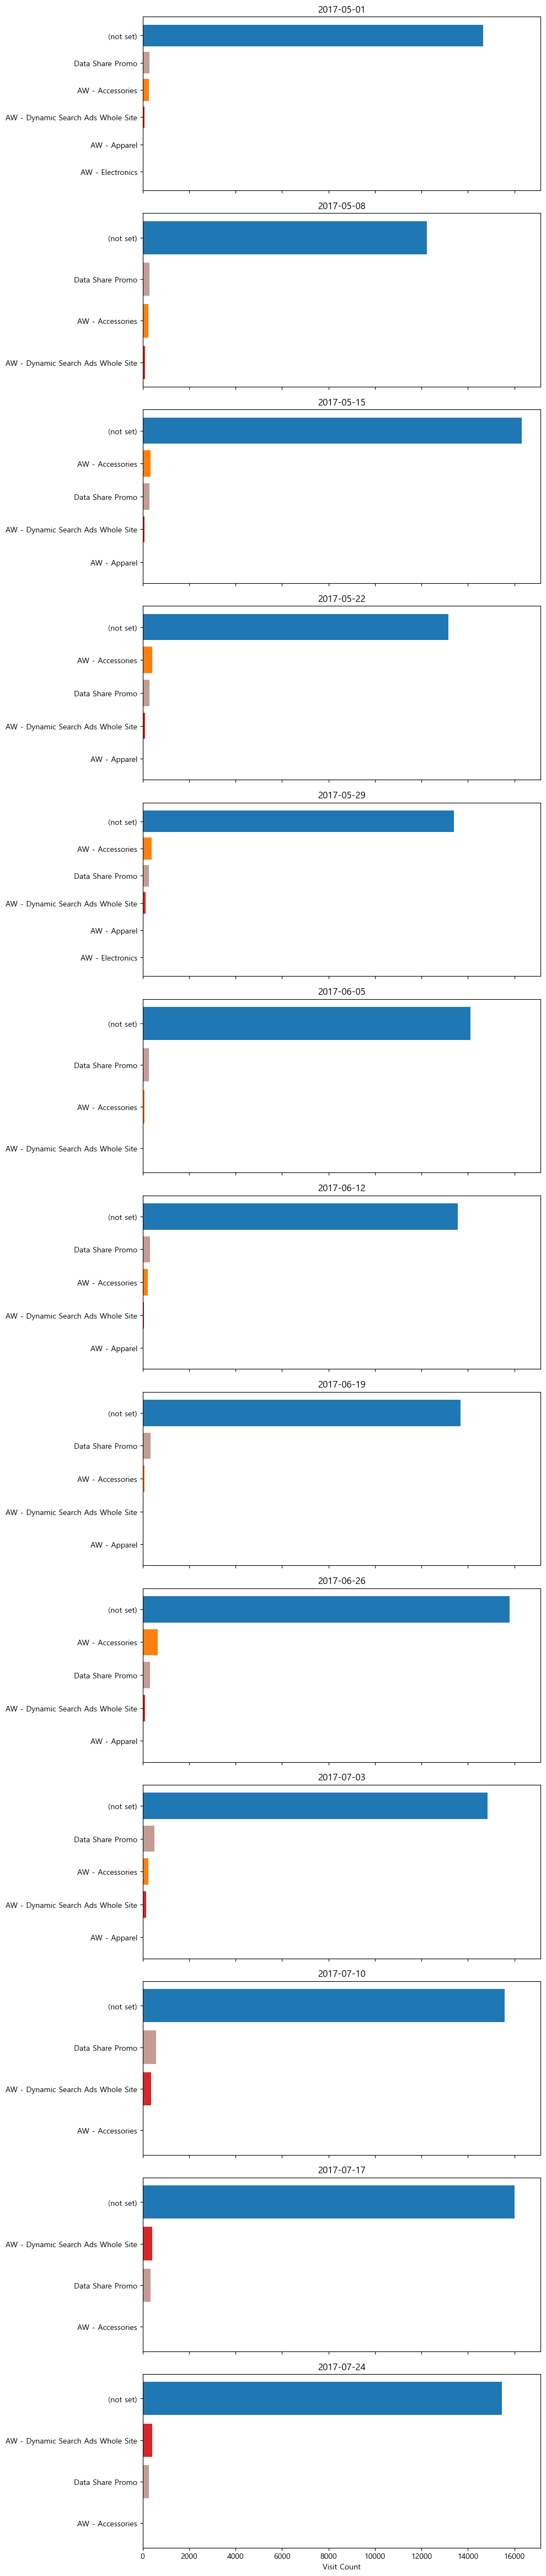

In [37]:
# 파라미터를 셀 상단에서 바로 정리하겠습니다.
weeks_to_show = 14
top_k = 6

# 원본 보호를 위해 복사본으로 작업하겠습니다.
dfp = weekly_cpn.copy()

# 주차가 문자열이면 datetime으로 통일하겠습니다.
if not np.issubdtype(dfp["_week_start"].dtype, np.datetime64):
    dfp["_week_start"] = pd.to_datetime(dfp["_week_start"])

# 캠페인 결측과 빈 문자열을 통일하겠습니다.
dfp["_campaign"] = dfp["_campaign"].fillna("(not set)").replace("", "(not set)")

# 최근 N주만 선택하겠습니다.
weeks = dfp["_week_start"].drop_duplicates().sort_values().to_list()[-weeks_to_show:]
dfp = dfp[dfp["_week_start"].isin(weeks)]

# 각 주에서 방문수 기준 상위 K개만 남기겠습니다.
dfp = (dfp.sort_values(["_week_start", "visit_count"], ascending=[True, False])
          .groupby("_week_start", group_keys=False)
          .head(top_k))

# 등장 캠페인에 대해 고정 색을 매핑하겠습니다.
from matplotlib.cm import get_cmap
campaigns = sorted(dfp["_campaign"].unique())
cmap = get_cmap("tab20", max(10, len(campaigns)))
color_map = {c: cmap(i % cmap.N) for i, c in enumerate(campaigns)}

# 주차 수에 맞춰 간단한 세로 패널을 만들겠습니다.
n = len(weeks)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(10, max(2.0, 0.6*top_k)*n), sharex=True)
if n == 1:
    axes = [axes]

# 주차별로 가로 막대를 그리겠습니다.
for ax, wk in zip(axes, weeks):
    wdf = dfp[dfp["_week_start"].eq(wk)].sort_values("visit_count", ascending=True)
    ax.barh(wdf["_campaign"], wdf["visit_count"], color=[color_map[c] for c in wdf["_campaign"]])
    ax.set_title(wk.strftime("%Y-%m-%d"))

# 공통 x축 라벨을 추가하고 레이아웃을 정리하겠습니다.
axes[-1].set_xlabel("Visit Count")
plt.tight_layout()
plt.show()

여기까지 보았을 때! 뭔가 특이점이 있었나요?

예상보다 06-26 주간 만의 차이점은 없었던 것 같아요.

그 직전 대략 한 달 간 구글을 통한 유입이 떨어지는 경우가 있었으나, 확실하게 이것이 원인이라고 말하긴 어려울 것 같아요.

모델링을 통해 데이터 이면의 숨은 뜻을 찾아봅시다!

다음 코드들은 세션의 피처를 활용하여 재방문 여부(0 or 1)을 예측하고 있어요.

`로지스틱 회귀를 이용한 분류`라고 할 수 있겠네요.

06-26주간을 test 셋으로 둔 후, 나머지 날짜들을 train set으로 두었을 때

test 주간은 예상보다 높은 리텐션을 보인걸까요? 혹은 더 낮은 리텐션을 보인걸까요?

In [ ]:
# 이 셀은 06-26 코호트의 1주 리텐션이 기대치보다 낮았는지 최소 전처리+로지스틱으로 확인합니다.

UID = "fullVisitorId"
TARGET_COHORT = pd.to_datetime("2017-06-26")

# 날짜를 파싱하고 각 세션 날짜를 그 주의 월요일로 스냅합니다.
k = df.copy()
k["_day"] = pd.to_datetime(k["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
k = k.dropna(subset=["_day"])
k["_first_day"]    = k.groupby(UID)["_day"].transform("min")
k["_first_week"]   = k["_first_day"]  - pd.to_timedelta(k["_first_day"].dt.weekday,  unit="D")
k["_session_week"] = k["_day"]        - pd.to_timedelta(k["_day"].dt.weekday,       unit="D")

# 최초 주로부터의 경과 주차를 계산하고 음수는 제거합니다.
k["week_passed"] = ((k["_session_week"] - k["_first_week"]).dt.days // 7).astype(int)
k = k[k["week_passed"] >= 0].copy()

# 데이터의 마지막 시작 주(부분 코호트)는 학습에서 제외합니다.
last_anchor = k["_first_week"].max()
k = k[k["_first_week"] != last_anchor].copy()

# 사용자 단위로 '1주 내 재방문 여부' 라벨을 만듭니다.
y1_uid = (
    k.groupby(UID)["week_passed"]
     .apply(lambda s: int((s == 1).any()))
     .rename("y")
)

# 사용자 첫 세션 한 행만 남기고 특징과 라벨을 결합합니다.
first_idx = k.groupby(UID)["_day"].idxmin()
base_cols = [
    UID, "_first_week",
    "trafficSource.source","trafficSource.medium","trafficSource.campaign","geoNetwork.country",
    "totals.newVisits","totals.pageviews","totals.timeOnSite",
    "action_type_count_1","action_type_count_2","action_type_count_3","action_type_count_5","action_type_count_6"
]
use_cols = [c for c in base_cols if c in k.columns]
X = k.loc[first_idx, use_cols].copy().join(y1_uid, on=UID)

# 타깃 코호트를 홀드아웃으로 두고 나머지 코호트로 학습합니다.
hold_df  = X[X["_first_week"].eq(TARGET_COHORT)].copy()
train_df = X[~X["_first_week"].eq(TARGET_COHORT)].copy()

# 범주형과 수치형 특징을 안전하게 구분합니다.
cat_cols = [c for c in ["trafficSource.source","trafficSource.medium","trafficSource.campaign","geoNetwork.country"] if c in X.columns]
num_cols = [c for c in ["totals.newVisits","totals.pageviews","totals.timeOnSite",
                        "action_type_count_1","action_type_count_2","action_type_count_3","action_type_count_5","action_type_count_6"] if c in X.columns]
feature_cols = cat_cols + num_cols

# 결측을 단순 대치하고 원-핫 인코딩 후 로지스틱 회귀로 예측합니다.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

pre = ColumnTransformer(
    transformers=[
        ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                          ("ohe", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
        ("num", Pipeline([("imp", SimpleImputer(strategy="median"))]), num_cols),
    ],
    remainder="drop",
)

pipe = Pipeline([("pre", pre),
                 ("clf", LogisticRegression(max_iter=2000, C=1.0, n_jobs=None))])

pipe.fit(train_df[feature_cols], train_df["y"])

# 홀드아웃 코호트의 예상 리텐션을 평균 확률로 계산합니다.
p_hat = pipe.predict_proba(hold_df[feature_cols])[:, 1]

# 실제값과 기대값, 그리고 잔차를 출력합니다.
actual   = float(hold_df["y"].mean())
expected = float(p_hat.mean())
residual = actual - expected

print(f"[Rows] train={len(train_df):,}, hold(06-26)={len(hold_df):,}")
print("=== 06-26 cohort — week_passed==1 (Heatmap-style) ===")
print(f"Actual   : {actual:.4f}")
print(f"Expected : {expected:.4f}")
print(f"Residual : {residual:+.4f}")

[Rows] train=142,219, hold(06-26)=13,603
=== 06-26 cohort — week_passed==1 (Heatmap-style) ===
Actual   : 0.0248
Expected : 0.0307
Residual : -0.0059


c:\Users\Allen\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


모델은 그 주간에 대해서 3.07%의 리텐션을 예상했습니다!

다만 우리가 알고 있다시피 실제로는 2.48% 밖에 보이지 않았죠.

0.59%의 차이는 어디서 난걸까요?

피처들(세그먼트)별로 예상값을 분해하여 어디서 제일 많은 오류가 났는지 파악해봅시다.

In [39]:
# 타깃 코호트와 사용자 키를 정의합니다.
UID = "fullVisitorId"
TARGET_COHORT = pd.to_datetime("2017-06-26")  # 월요일 앵커(2017-06-26)

# 날짜를 파싱하고 월요일 시작 주차로 스냅합니다.
kdf = df.copy()
kdf["_day"] = pd.to_datetime(kdf["date"].astype(str), format="%Y%m%d", errors="coerce").dt.normalize()
kdf = kdf.dropna(subset=["_day"])
kdf["_first_day"]   = kdf.groupby(UID)["_day"].transform("min")
kdf["_first_week"]  = kdf["_first_day"]  - pd.to_timedelta(kdf["_first_day"].dt.weekday,  unit="D")
kdf["_session_week"] = kdf["_day"]       - pd.to_timedelta(kdf["_day"].dt.weekday,       unit="D")

# 다음 주에 재방문했는지를 사용자 단위 라벨로 만듭니다.
kdf["week_pass"] = ((kdf["_session_week"] - kdf["_first_week"]).dt.days // 7).astype(int)
y_heatmap = kdf.groupby(UID)["week_pass"].transform(lambda s: int((s == 1).any()))

# 첫 세션만 남기고 필요한 열과 라벨을 구성합니다.
first = kdf["_day"].eq(kdf["_first_day"])
X = kdf.loc[first, [
    UID, "_first_week",
    "trafficSource.source", "trafficSource.medium", "trafficSource.campaign", "geoNetwork.country"
]].copy()
X["y"] = y_heatmap.loc[first].astype(int)

# 타깃 코호트를 홀드아웃으로, 나머지를 기준선으로 분리합니다.
hold = X[X["_first_week"].eq(TARGET_COHORT)]
base = X[~X["_first_week"].eq(TARGET_COHORT)]

# 세그먼트별 잔차 테이블을 계산하는 간단 함수를 만듭니다.
def seg_table(by: str, min_n_target=30, top_k=12, underperform=True):
    base_mean = base.groupby(by, dropna=False)["y"].mean().rename("expected_base")
    tgt = hold.groupby(by, dropna=False)["y"].agg(n="size", actual="mean").reset_index()
    out = tgt.merge(base_mean, on=by, how="left")
    out["expected_base"] = out["expected_base"].fillna(out["actual"].mean())
    out["residual"] = out["actual"] - out["expected_base"]
    out["contrib_users"] = out["residual"] * out["n"]
    out = out.query("n >= @min_n_target")
    out = out.sort_values("contrib_users", ascending=underperform)
    return out.head(top_k)

# 결과 요약과 주요 세그먼트 잔차를 표시합니다.
print(f"[Rows] target(06-26)={len(hold):,} | Actual={hold['y'].mean():.4f}")

from IPython.display import display
for col in ["trafficSource.source", "trafficSource.medium", "trafficSource.campaign", "geoNetwork.country"]:
    print(f"\n## [UNDER] by {col}")
    display(seg_table(col, min_n_target=30, top_k=12, underperform=True)
            [[col, "n", "actual", "expected_base", "residual", "contrib_users"]])

[Rows] target(06-26)=14,517 | Actual=0.0276

## [UNDER] by trafficSource.source


,trafficSource.source,n,actual,expected_base,residual,contrib_users
0,(direct),4111,0.037704,0.051767,-0.014063,-57.812146
17,google,7432,0.025969,0.032055,-0.006086,-45.230811
1,Partners,282,0.021277,0.044250,-0.022974,-6.478579
35,m.facebook.com,464,0.002155,0.007449,-0.005294,-2.456238
14,facebook.com,76,0.026316,0.047059,-0.020743,-1.576471
3,analytics.google.com,257,0.038911,0.043565,-0.004655,-1.196294
22,google.com,70,0.014286,0.022954,-0.008668,-0.606786
48,quora.com,37,0.000000,0.016129,-0.016129,-0.596774
49,reddit.com,37,0.000000,0.007026,-0.007026,-0.259953
57,t.co,35,0.000000,0.006961,-0.006961,-0.243619



## [UNDER] by trafficSource.medium


,trafficSource.medium,n,actual,expected_base,residual,contrib_users
0,(none),4111,0.037704,0.051768,-0.014065,-57.819263
4,organic,6886,0.025559,0.030345,-0.004786,-32.957899
5,referral,2570,0.017510,0.025176,-0.007666,-19.701809
2,cpc,654,0.027523,0.057062,-0.029539,-19.318644
1,affiliate,282,0.021277,0.044250,-0.022974,-6.478579



## [UNDER] by trafficSource.campaign


,trafficSource.campaign,n,actual,expected_base,residual,contrib_users
0,(not set),13585,0.027825,0.038600,-0.010775,-146.380799
1,AW - Accessories,562,0.017794,0.054054,-0.036260,-20.378378
4,Data Share Promo,282,0.021277,0.044250,-0.022974,-6.478579
3,AW - Dynamic Search Ads Whole Site,83,0.072289,0.061093,0.011196,0.929260



## [UNDER] by geoNetwork.country


,geoNetwork.country,n,actual,expected_base,residual,contrib_users
153,United States,6037,0.039424,0.054906,-0.015482,-93.464605
63,India,977,0.008188,0.021341,-0.013152,-12.849818
51,Germany,390,0.002564,0.022794,-0.020230,-7.889783
27,Canada,399,0.022556,0.038661,-0.016104,-6.425668
126,Singapore,138,0.014493,0.058700,-0.044207,-6.100629
132,South Korea,87,0.000000,0.043812,-0.043812,-3.811610
49,France,388,0.015464,0.024101,-0.008637,-3.351030
87,Malaysia,163,0.006135,0.026575,-0.020440,-3.331693
115,Poland,125,0.000000,0.026455,-0.026455,-3.306878
71,Japan,364,0.027473,0.035828,-0.008356,-3.041472


가장 큰 차이가 난 부분은 `trafficSource.campaign`의 `(not set)`

그리고 `geoNetwork.country`의 `United States`였습니다.

다만 `(not set)`의 경우 결측값이 현재 섞여있기에 더 해석은 데이터 전처리 차원에서 다시 접근해야 할 것 같아요.

그렇기에 지금 시간에는 제하고 다음 원인은 `United States`에 더 집중해볼게요.

**인사이트:**
* 빠른 해석 포인트

1. 미국 중심의 직접/오가닉 저하
    * 06-26 코호트에서 미국 + (direct/organic/google) 비중이 크고, 이 군이 기대 대비 일괄 하락 → 전체 리텐션을 끌어내렸습니다.

2. 캠페인 트래킹/믹스 이슈
    * **(not set)**의 대규모 −146명은 캠페인 파라미터 누락 또는 성과 낮은 유입의 집중을 시사. 동일 기간 cpc/affiliate도 기대 미달.

3. 달력 효과(캘린더)
    * 06-26 코호트의 1주차 창은 2017-07-03 주간(미국 Independence Day, 7/4)와 겹칩니다. 미국 트래픽의 자연감소로 1주차 재방문이 약해졌을 가능성이 큼.

# 4. Revenue (수익)
: 고객으로부터 얼마나 수익을 창출할 수 있는지를 파악해 봅시다.<br>

**사용자가 우리 서비스에 대해 실제 비용을 지불하는가?**

서비스의 핵심 가치를 금전적 가치로 전환시켜 수익을 창출하고, 그 수준을 측정할 수 있는 지표를 정의하고 관리하는 단계.

**이번 단계에서 수행할 분석**

* 그룹별 RPV(방문당 평균 수익) 비교 분석
* RFM 분석을 통한 고객 세그먼트 분류
* 고객 세그먼트별 ARPU(사용자당 평균 수익), RPR(재구매율), LTV(고객생애가치) 산출

## 4.1. 유입 경로별 RPV
*RPV란?<br>*
*:Revenue per visit(방문당 평균 수익)을 말해요<br>*
*방문 횟수가 매출과 얼마나 연결되는지 보여주는 지표 중 하나에요!*

In [ ]:
# 원본을 보호하기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 매출을 숫자(통화 단위)로 변환하겠습니다.
# - GA 샘플은 마이크로 단위일 수 있어서 1,000,000으로 나누겠습니다.
# - 변환 실패나 결측은 0으로 처리하겠습니다.
kdf["_revenue"] = pd.to_numeric(kdf.get("totals.transactionRevenue"), errors="coerce").fillna(0) / 1_000_000

# 거래가 발생한 세션만 고르겠습니다.
df_purchase = kdf[***]

# 유입 소스별로 구매 세션 수·총매출·RPV를 계산하겠습니다.
# - visit_count는 구매가 발생한 세션 수를 뜻합니다.
# - rpv는 세션당 매출(= total_revenue / visit_count)입니다.
df_inflow_RPV = (
    df_purchase.groupby("trafficSource.source", dropna=False)
      .***(    # 집계함수를 한번에 쓰게 해주는 좋은 친구가 있었던 것 같은데...
          visit_count=("trafficSource.source", "size"),
          total_revenue=("_revenue", "sum"),
      )
      .assign(rpv=lambda d: d["total_revenue"] / d["visit_count"])
      .rename(columns={"trafficSource.source": "source"})
      .sort_values("rpv", ascending=False)
      .reset_index()
)

# 상위 20개를 확인하겠습니다.
df_inflow_RPV.head(20)

,trafficSource.source,visit_count,total_revenue,rpv
0,dfa,18,11772.56,654.031111
1,mail.google.com,16,3198.43,199.901875
2,sites.google.com,13,1638.57,126.043846
3,(direct),2162,272246.67,125.923529
4,Partners,4,487.71,121.927500
5,search.myway.com,1,100.94,100.940000
6,google,812,75323.36,92.762759
7,dealspotr.com,3,257.65,85.883333
8,duckduckgo.com,1,84.07,84.070000
9,chat.google.com,1,66.03,66.030000


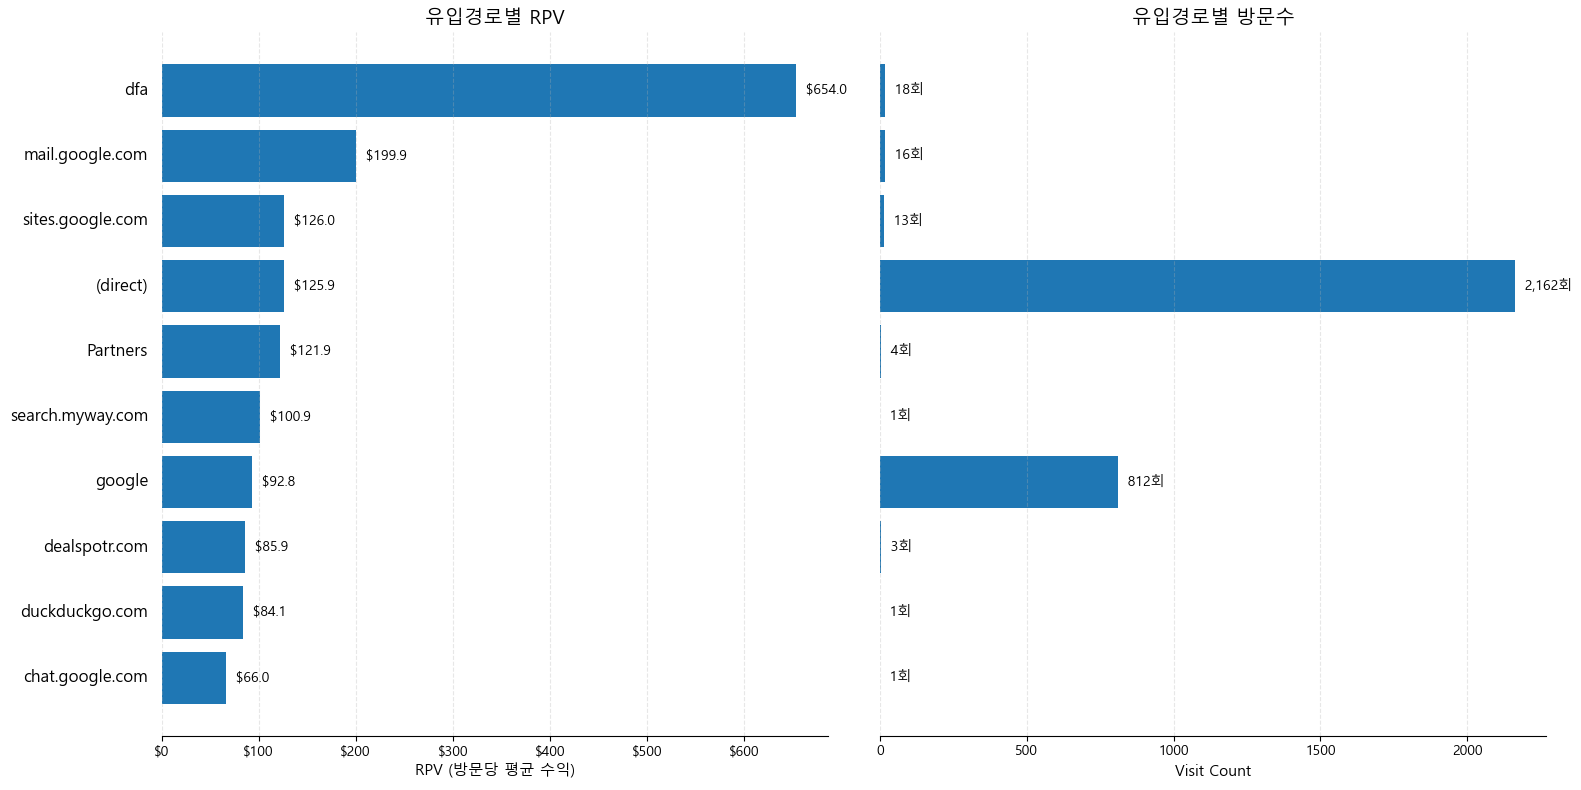

In [41]:
from matplotlib.ticker import FuncFormatter
from matplotlib import transforms
import textwrap

# 1) 데이터 준비: 컬럼명 통일 + 상위 10개만
plot_df = (
    df_inflow_RPV.rename(columns={"trafficSource.source": "source"})
                 .sort_values("rpv", ascending=False)
                 .head(10)
                 .reset_index(drop=True)
)

# 2) 긴 라벨은 보기 좋게 줄바꿈
def wrap_label(s, width=18):
    s = "(not set)" if s is None or s == "" else str(s)
    return "\n".join(textwrap.wrap(s, width=width)) if len(s) > width else s

sources_raw = plot_df["source"].tolist()
sources_lbl = [wrap_label(s) for s in sources_raw]
rpv     = plot_df["rpv"].to_numpy()
visits  = plot_df["visit_count"].to_numpy()
ypos    = np.arange(len(sources_lbl))

# 3) 왼쪽 여백을 넉넉히 주고 시작
fig, (ax_l, ax_r) = plt.subplots(
    1, 2, figsize=(16, 8), sharey=True, gridspec_kw={"width_ratios":[1, 1]}
)
plt.subplots_adjust(left=0.40, wspace=0.18)  # ← 여백 크게

# ── 좌측: RPV ──
ax_l.barh(ypos, rpv)
ax_l.invert_yaxis()
ax_l.set_xlabel("RPV (방문당 평균 수익)", fontsize=11)
ax_l.set_title("유입경로별 RPV", fontsize=14)
ax_l.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f"${x:,.0f}"))
ax_l.set_yticks([])  # 축 라벨은 지우고…

# …대신 막대 왼쪽에 소스명을 직접 그립니다(축 좌표를 섞어 써서 항상 보이게).
trans = transforms.blended_transform_factory(ax_l.transAxes, ax_l.transData)
for y, name, v in zip(ypos, sources_lbl, rpv):
    ax_l.text(-0.02, y, name, transform=trans, va="center", ha="right", fontsize=12)
    ax_l.text(v, y, f"  ${v:,.1f}", va="center", ha="left", fontsize=10)

# ── 우측: 방문수 ──
ax_r.barh(ypos, visits)
ax_r.set_title("유입경로별 방문수", fontsize=14)
ax_r.set_xlabel("Visit Count", fontsize=11)
ax_r.set_yticks([])  # 공유 y축이므로 여기서도 축 라벨은 숨깁니다.
for y, v in zip(ypos, visits):
    ax_r.text(v, y, f"  {v:,.0f}회", va="center", ha="left", fontsize=10)

# 보조 격자/테두리 정리
for ax in (ax_l, ax_r):
    ax.grid(axis="x", linestyle="--", alpha=0.3)
    for sp in ("top","right","left"):
        ax.spines[sp].set_visible(False)

plt.tight_layout()
plt.show()

## 4.2. 캠페인별 RPV

In [ ]:
# 원본을 보존하기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 매출을 숫자로 변환하고 마이크로 단위를 통화 단위로 보정하겠습니다.
kdf["_revenue"] = pd.to_numeric(kdf.get("totals.transactionRevenue"), errors="coerce").fillna(0) / 1_000_000

# 구매가 발생한 세션만 남기겠습니다.
df_txn = kdf[***].copy()

# 캠페인 라벨을 정리하여 결측·공백을 '(not set)'으로 통일하겠습니다.
df_txn["_campaign"] = (
    df_txn.get("trafficSource.campaign")
          .astype(str).str.strip()
          .replace({"<NA>": "(not set)", "": "(not set)", "None": "(not set)"})
          .fillna("(not set)")
)

# 캠페인별로 방문 수와 매출을 집계하고 방문당 매출(RPV)을 계산하겠습니다.
agg_campaign = (
    df_txn.***("***", dropna=False) # 캠페인별로 묶어주기!
          .agg(visit_count=("fullVisitorId", "count"),
               total_revenue=("_revenue", "sum"))
          .assign(rpv=lambda d: d["total_revenue"] / d["visit_count"])
          .sort_values("rpv", ascending=False)
          .reset_index()
          .rename(columns={"_campaign": "campaign"})
)

# 상위 10개만 미리 보겠습니다.
agg_campaign.head(10)

,campaign,visit_count,total_revenue,rpv
0,AW - Accessories,51,7027.73,137.798627
1,Data Share Promo,4,487.71,121.927500
2,(not set),2983,357389.63,119.808793
3,AW - Dynamic Search Ads Whole Site,54,2875.18,53.244074


## 4.3. 방문 매체

In [ ]:
# 원본을 보존하기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 매출과 거래 수를 숫자로 변환하고 단위를 보정하겠습니다.
kdf["_revenue"]      = pd.to_numeric(kdf["totals.transactionRevenue"], errors="coerce").fillna(0) / 1_000_000
kdf["_transactions"] = pd.to_numeric(kdf["totals.transactions"],       errors="coerce").fillna(0).astype(int)

# 실제 거래가 발생한 세션만 대상으로 삼겠습니다.
df_txn = ***

# 유입 매체 라벨을 정리하여 결측·공백을 '(not set)'으로 통일하겠습니다.
df_txn["_medium"] = (
    df_txn["trafficSource.medium"]
         .astype(str).str.strip()
         .replace({"<NA>": "(not set)", "": "(not set)", "None": "(not set)"})
         .fillna("(not set)")
)

# 매체별 방문 수와 매출을 집계하고 방문당 매출(RPV)을 계산하겠습니다.
agg_medium = (
    df_txn.groupby("_medium", dropna=False)
          .agg(
              visit_count=("fullVisitorId", "count"),
              total_revenue=("_revenue", "sum")
          )
          .assign(rpv=lambda d: d["total_revenue"] / d["visit_count"])
          .sort_values("rpv", ascending=False)
          .reset_index()
          .rename(columns={"_medium": "medium"})
)

# 상위 10개 결과만 확인하겠습니다.
agg_medium.head(10)

,medium,visit_count,total_revenue,rpv
0,cpm,35,13112.33,374.638000
1,(none),2162,272246.67,125.923529
2,affiliate,4,487.71,121.927500
3,cpc,106,9918.89,93.574434
4,organic,702,64748.26,92.233989
5,referral,83,7266.39,87.546867


## 4.4. RFM 분석
: 고객의 구매 행동을 기반으로 충성도 높은 고객을 식별하고 마케팅 전략을 최적화하는 데 사용되는 데이터 분석 기법.


RFM 분석의 세 가지 요소

* Recency (최신성): 현재날짜와 고객이 마지막으로 구매한 날짜의 차이
* Frequency (빈도): 고객이 특정 기간 동안 몇 번 구매했는지 (구매 횟수)
* Monetary (금액): 고객이 특정 기간 동안 총 얼마를 소비했는지 (구매 금액)

### (1) R, F, M 변수 생성

In [ ]:
# 원본을 보존하기 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 기준일을 정하고(리센시 계산의 기준점), 금액/거래 수를 숫자로 바꾸겠습니다.
REF_DATE = pd.to_datetime("2017-08-02")
kdf["_revenue"]      = pd.to_numeric(kdf["totals.transactionRevenue"], errors="coerce").fillna(0) / 1_000_000
kdf["_transactions"] = pd.to_numeric(kdf["totals.transactions"],       errors="coerce").fillna(0).astype(int)

# 실제로 거래가 있는 세션만 남기겠습니다.
tx = kdf.loc[kdf["_transactions"] > 0].copy()

# 날짜를 YYYYMMDD에서 datetime으로 바꾸겠습니다.
tx["_date"] = pd.to_datetime(tx["date"].astype(str), format="%Y%m%d", errors="coerce")

# 사용자 기준으로 마지막 구매일, 구매 빈도, 총 매출을 계산하겠습니다.
rfm = (
    tx.groupby("fullVisitorId", as_index=False)
      .agg(last_visit=("***", "max"),
           frequency =("fullVisitorId", "***"),
           monetary  =("***", "***"))
)

# 기준일과 마지막 구매일의 차이로 리센시(일수)를 계산하겠습니다.
rfm["recency"] = (REF_DATE - rfm["last_visit"]).dt.days

# 필요한 열만 정리해 반환하겠습니다.
df_rfm = rfm[["fullVisitorId", "recency", "frequency", "monetary"]]
df_rfm.head()

,fullVisitorId,recency,frequency,monetary
0,0024932550342595467,11,1,126.89
1,0143782636543876435,11,1,75.98
2,0396718069117936487,11,1,23.94
3,057693500927581077,11,1,558.50
4,081281456829886913,11,1,78.71


### (2) R, F, M 점수 설정

In [45]:
# RFM 점수를 간단히 매겨 보겠습니다.

# 1) 등급 라벨을 준비합니다. (R은 최근일수 작을수록 높게, M은 금액 클수록 높게)
R_LABELS = [5, 4, 3, 2, 1]
M_LABELS = [1, 2, 3, 4, 5]
N_QUANT  = 5  # 5분위 기본

def safe_qcut(s, q, labels):
    """
    시리즈를 분위수로 나누어 라벨을 부여하겠습니다.
    - 유니크 값이 적으면 분위수 개수를 자동으로 줄이겠습니다.
    - 경계가 겹치면(drop) 가능한 구간만 사용하겠습니다.
    - 모든 값이 같아 1구간만 가능하면 중앙 라벨로 채우겠습니다.
    """
    s = pd.to_numeric(s, errors="coerce")
    k = s.dropna().nunique()
    q_eff = min(q, max(1, k), len(labels))
    if q_eff <= 1:
        return pd.Series([labels[(len(labels)-1)//2]] * len(s), index=s.index)
    return pd.qcut(s, q_eff, labels=labels[:q_eff], duplicates="drop")

# 2) 결측·무한대를 NaN으로 통일하겠습니다.
rfm_src = df_rfm.replace([np.inf, -np.inf], np.nan).copy()

# 3) R/M 점수를 구간화하겠습니다. (recency는 작을수록 좋은 등급을 부여합니다)
rfm_src["R_score"] = safe_qcut(rfm_src["recency"],  N_QUANT, R_LABELS)
rfm_src["M_score"] = safe_qcut(rfm_src["monetary"], N_QUANT, M_LABELS)

# 4) F 점수는 규칙 기반으로 간단히 매기겠습니다. (2회 이상=2, 그 외=1)
rfm_src["F_score"] = (rfm_src["frequency"].fillna(0) >= 2).astype(int) + 1

# 5) 최소한 R/M 등급이 있는 행만 남기고 결과 컬럼만 정리하겠습니다.
rfm_df = (
    rfm_src.dropna(subset=["R_score", "M_score"])
           .loc[:, ["fullVisitorId", "recency", "frequency", "monetary",
                    "R_score", "F_score", "M_score"]]
           .reset_index(drop=True)
)

# 결과 확인
rfm_df.head()

,fullVisitorId,recency,frequency,monetary,R_score,F_score,M_score
0,0024932550342595467,11,1,126.89,5,1,5
1,0143782636543876435,11,1,75.98,5,1,4
2,0396718069117936487,11,1,23.94,5,1,2
3,057693500927581077,11,1,558.50,5,1,5
4,081281456829886913,11,1,78.71,5,1,4


### (3) 고객 세분화

In [46]:
def classify_customer_segment(row):
    # 각 행(row)의 R/F/M 점수를 정수로 변환하여 사용
    R, F, M = int(row["R_score"]), int(row["F_score"]), int(row["M_score"])

    # 세그먼트 규칙 1: 최근 방문이 매우 가깝고(R=5), 재방문 빈도 높으며(F≥2), 금액도 큼(M=5)
    # → 핵심 우수 고객
    if (R == 5) and (F >= 2) and (M == 5):
        return "Champions"

    # 세그먼트 규칙 2: 최근성/빈도/금액이 전반적으로 높은 고객
    # (R≥3, F≥1, M≥4) → 충성 고객
    elif (R >= 3) and (F >= 1) and (M >= 4):
        return "Loyal Customers"

    # 세그먼트 규칙 3: 전반적으로 활동은 있으나(최소 조건 충족), 이탈 위험 구간
    # (R≥2, F≥1, M≥1) → 위험 고객
    elif (R >= 2) and (F >= 1) and (M >= 1):
        return "At Risk"

    # 세그먼트 규칙 4: 최근성이 매우 낮은(R=1) 고객(과거 활동은 있었음)
    # → 이탈 고객
    elif (R == 1) and (F >= 1) and (M >= 1):
        return "Lost"

    # 위 조건에 모두 해당하지 않는 경우 기본 라벨
    return "Other"  # 기본 라벨 추가

# 행 단위로 분류 함수를 적용해 세그먼트 컬럼 생성
rfm_df["Segment"] = rfm_df.apply(classify_customer_segment, axis=1)
rfm_df

,fullVisitorId,recency,frequency,monetary,R_score,F_score,M_score,Segment
0,0024932550342595467,11,1,126.89,5,1,5,Loyal Customers
1,0143782636543876435,11,1,75.98,5,1,4,Loyal Customers
2,0396718069117936487,11,1,23.94,5,1,2,At Risk
3,057693500927581077,11,1,558.50,5,1,5,Loyal Customers
4,081281456829886913,11,1,78.71,5,1,4,Loyal Customers
...,...,...,...,...,...,...,...,...
2787,9973195165804180005,70,1,23.76,2,1,2,At Risk
2788,9973665079624172058,9,1,78.95,5,1,4,Loyal Customers
2789,9974351919673138742,16,1,53.60,5,1,3,At Risk
2790,9982700667464896535,82,1,33.59,1,1,2,Lost


In [47]:
# 각 세그먼트의 비율(빈도 비율) 계산
# normalize=True ⇒ 절대개수 대신 전체 대비 비율(0~1)로 반환
# 퍼센트(%)로 보기 + 내림차순 정렬
(rfm_df["Segment"].value_counts(normalize=True)
        .sort_values(ascending=False)
        .mul(100).round(2))

Segment
At Risk            55.41
Loyal Customers    22.78
Lost               19.91
Champions           1.90
Name: proportion, dtype: float64

(4) 각 세그먼트 별 ARPU, RPR, LTV 분석

* 사용자당 평균 수익 (ARPU, Average Revenue Per User) = 총 매출액 / 총 고객 수
* 재구매율 (RPR, Repeat Purchase Rate) = 두 번 이상 구매한 고객 수 / 전체 구매 고객 수
* 고객 생애 가치 (LTV, Customer Lifetime Value) = ARPU * 고객 평균 생애 기간 (고객이 평생 창출할 수 있는 총 가치를 추정)

In [48]:
# 원본 보존을 위해 복사본에서 작업하겠습니다.
kdf = df.copy()

# 거래수를 안전하게 숫자형으로 변환하고 결측은 0으로 대체하겠습니다.
kdf["_transactions"] = pd.to_numeric(kdf["totals.transactions"], errors="coerce").fillna(0).astype(int)

# 실제 거래가 있는 세션만 남기겠습니다.
txn = kdf[kdf["_transactions"] > 0].copy()

# 날짜를 YYYYMMDD에서 datetime으로 파싱하고 결측은 제거하겠습니다.
txn["_date"] = pd.to_datetime(txn["date"].astype(str), format="%Y%m%d", errors="coerce")
txn = txn.dropna(subset=["_date"])

# 고객별 최초/최종 구매일을 집계하겠습니다.
g = txn.groupby("fullVisitorId")["_date"].agg(first_date="min", last_date="max").reset_index()

# 최초~최종 사이의 ‘포함 기간’ 일수를 계산하겠습니다.
g["date_diff"] = (g["last_date"] - g["first_date"]).dt.days + 1

# 결과를 간단히 확인하겠습니다.
print(g.head())
print("고객 수:", len(g))

         fullVisitorId first_date  last_date  date_diff
0  0024932550342595467 2017-07-22 2017-07-22          1
1  0143782636543876435 2017-07-22 2017-07-22          1
2  0396718069117936487 2017-07-22 2017-07-22          1
3   057693500927581077 2017-07-22 2017-07-22          1
4   081281456829886913 2017-07-22 2017-07-22          1
고객 수: 2792


In [ ]:
# 원본을 보존하기 위해 필요한 컬럼만 복사하겠습니다.
need_cols = ["fullVisitorId", "Segment", "F_score", "monetary"]
rfm = rfm_df[need_cols].copy()

# F_score가 숫자가 아닐 수 있으므로 안전하게 정수로 변환하겠습니다.
rfm["F_score"] = pd.to_numeric(rfm["F_score"], errors="coerce").fillna(0).astype(int)

# 1) 재구매 고객 수를 세그먼트별로 집계하겠습니다.
re_counts = (
    rfm.loc[rfm["F_score"] > 1]
       .groupby("Segment", dropna=False)["fullVisitorId"]
       .nunique()
       .rename("count_over_twice")
       .reset_index()
)

# 2) 세그먼트 요약을 위해 날짜 차이를 고객 테이블에 결합하겠습니다.
datediff = g[["fullVisitorId", "date_diff"]].copy()
base = (
    rfm.merge(datediff, on="fullVisitorId", how="left")
       .assign(
           monetary=lambda d: pd.to_numeric(d["monetary"], errors="coerce").fillna(0.0),
           date_diff=lambda d: pd.to_numeric(d["date_diff"], errors="coerce")  # NaN은 그대로 두겠습니다.
       )
)

# 3) 세그먼트별 총매출·고객수·평균 생애기간을 집계하겠습니다.
seg_summary = (
    base.groupby("Segment", dropna=False)
        .agg(
            total_monetary=("monetary", "sum"),
            n_users=("***", "***"),
            avg_lifetime=("***", "***")
        )
        .reset_index()
)

# 4) ARPU와 재구매율(RPR)을 계산하겠습니다.
seg_summary["ARPU"] = seg_summary["total_monetary"] / seg_summary["n_users"]
seg_summary = seg_summary.merge(re_counts, on="Segment", how="left")
seg_summary["count_over_twice"] = seg_summary["count_over_twice"].fillna(0).astype(int)
seg_summary["RPR"] = seg_summary["count_over_twice"] / seg_summary["n_users"]

# 5) 간이 LTV(일 단위)를 계산하고 결과 테이블을 정리하겠습니다.
seg_summary["LTV"] = seg_summary["ARPU"] * seg_summary["avg_lifetime"]
df_segment = seg_summary[["Segment", "ARPU", "RPR", "LTV"]].sort_values("LTV", ascending=False)

# 6) 결과를 확인하겠습니다.
df_segment

,Segment,ARPU,RPR,LTV
1,Champions,939.550755,1.000000,31501.541342
3,Loyal Customers,276.259937,0.154088,1214.066862
2,Lost,99.965522,0.026978,110.393580
0,At Risk,56.045191,0.038785,86.295827


**인사이트:**

1. 세그먼트별 고객 분포
* At Risk 그룹이 가장 큰 비중(55.41%)을 차지하고 있다.
* 이들을 어떻게 재활성화하고 유지할지에 대한 전략 필요
* Loyal Customers(22.4%), Lost(19.7%), Champions(1.4%) 순으로 분포
* Lost 그룹의 이탈 이유를 파악해야함.
    * 해당 작업은 퍼널 분석(Funnel Analysis)으로 보다 자세히 파악 가능

2. 세그먼트별 특징
    1. Champions
    * 높은 구매빈도, 재구매율, 구매금액을 보유한 핵심 고객 그룹 
    * ~~~

    2. Loyal Customers
    * 중간 이상의 구매빈도, 재구매율, 구매금액을 유지
    * ~~~
    
    3. At Risk
    * 가장 큰 비중이지만 매출 기여도는 낮은 편
    * ~~~
    * ~~~

    4. Lost
    * 이미 이탈했지만 At Risk 그룹보다 높은 지표들을 보유하고 있어, 복귀 시 상당한 수익을 기대할 수 있음.
    * ~~~

3. 결론
~~~

# 5. Referral (추천)
: 기존 고객이 다른 사람에게 제품이나 서비스를 추천하는지, 즉 자연스러운 입소문 효과를 분석해봅시다.

**사용자들이 우리 서비스를 주변 지인에게 소개/ 추천하는가?**

즉, 서비스를 이용한 고객이 만족하여 자발적 바이럴 및 공유를 일으키는 것을 의미한다.

해당 단계는 충성도가 높은 고객들만 추천행동을 하기에 퍼널 내 가장 좁은 위치다.

**이번 단계에서 수행할 분석**

* GA는 추천 발송 데이터가 존재하지 않기 때문에, 이번 분석에서는 추천으로 유입된 '추천 유입 유저' 그룹과 추천으로 유입되지 않은 '일반 유입 유저' 그룹 간에 차이를 분석해볼게요.
* 추천 / 일반 유입 고객 그룹 각각 퍼널의 전환율, 이탈율 비교 분석 해 z-검정 수행

## 5.1. 추천 / 일반 유입 고객별 수익 비교 분석

### (1) 추천 유입 유저

In [ ]:
# 원본을 보존하기 위해 복사본에서 작업하겠습니다.
k = df.copy()

# 필요한 열을 숫자형으로 안전 변환하고 보조 열을 준비하겠습니다.
k["_medium"]     = k["trafficSource.medium"]                                   # 필터 편의를 위해 미디엄을 보조 열로 복사하겠습니다.
k["_pageviews"]  = pd.to_numeric(k["totals.pageviews"], errors="coerce").fillna(0)        # 페이지뷰를 숫자형으로 변환하겠습니다.
k["_timeOnSite"] = pd.to_numeric(k["totals.timeOnSite"], errors="coerce").fillna(0)       # 체류시간을 숫자형으로 변환하겠습니다.
k["_revenue_u"]  = pd.to_numeric(k["totals.transactionRevenue"], errors="coerce").fillna(0)  # 매출 마이크로 단위를 숫자형으로 변환하겠습니다.

# referral 미디엄이면서 매출이 발생한 세션만 선택하겠습니다.
ref = k[(***) & (***)].copy()

# 표본 수를 산출하겠습니다.
n = len(ref)

# 요청 지표를 계산하겠습니다.
total_sessions   = n                                                                 # 총 세션 수를 계산하겠습니다.
avg_session_dur  = ref["_timeOnSite"].mean() if n else np.nan                        # 평균 체류시간(초)을 계산하겠습니다.
avg_pageviews    = ref["_pageviews"].mean() if n else np.nan                         # 평균 페이지뷰를 계산하겠습니다.
total_revenue    = (ref["_revenue_u"].sum() / 1_000_000) if n else 0.0               # 총 매출을 통화 단위로 환산하겠습니다.
rpv              = (total_revenue / n) if n else np.nan                              # 방문당 매출을 계산하겠습니다.

# 한 행 요약 테이블로 정리하겠습니다.
df_referral_traffic = pd.DataFrame([{
    "total_sessions": total_sessions,
    "avg_session_duration": avg_session_dur,
    "avg_pageviews": avg_pageviews,
    "total_revenue": total_revenue,
    "rpv": rpv,
}])

df_referral_traffic

,total_sessions,avg_session_duration,avg_pageviews,total_revenue,rpv
0,83,785.506024,20.277108,7266.39,87.546867


### (2) 일반 유입 유저

In [ ]:
# 원본 변경을 피하기 위해 복사본에서 작업하겠습니다.
k = df.copy()

# 필요한 열을 숫자형으로 안전 변환하고 보조 열을 준비하겠습니다.
k["_medium"]     = k["trafficSource.medium"]
k["_pageviews"]  = pd.to_numeric(k["totals.pageviews"], errors="coerce").fillna(0)
k["_timeOnSite"] = pd.to_numeric(k["totals.timeOnSite"], errors="coerce").fillna(0)
k["_revenue_u"]  = pd.to_numeric(k["totals.transactionRevenue"], errors="coerce").fillna(0)  # 마이크로 단위로 가정하겠습니다.

# referral이 아닌 트래픽 중 매출이 발생한 세션만 선별하겠습니다.
not_ref = k[(k["_medium"] != "referral") & (k["_revenue_u"] > 0)].copy()

# 표본 수에 따라 요약 지표를 계산하겠습니다.
n = len(not_ref)
avg_dur = (***)
avg_pv  = (***)
tot_rev = (***) if n else 0.0  # 통화 단위로 환산하겠습니다.
rpv     = (***) if n else float("nan")

# 한 행 요약 테이블로 반환하겠습니다.
df_not_referral_traffic = pd.DataFrame([{
    "total_sessions": n,
    "avg_session_duration": avg_dur,
    "avg_pageviews": avg_pv,
    "total_revenue": tot_rev,
    "rpv": rpv,
}])

df_not_referral_traffic

,total_sessions,avg_session_duration,avg_pageviews,total_revenue,rpv
0,3009,1022.979395,24.109671,360513.86,119.811851


## 5.2. 추천/일반 그룹별 퍼널 분석

### (1) 추천 유입 유저

In [ ]:
# 코드 ↔ 라벨 매핑을 정의하겠습니다.
ACTION_LABELS = {
    "1": "Product list",
    "2": "Product detail page",
    "3": "Add to cart",
    "5": "Check out",
    "6": "Completed purchase",
}
ACTION_CODES = ["1", "2", "3", "5", "6"]  # 출력 순서를 고정하겠습니다.

def extract_funnels(df: pd.DataFrame, medium_filter: str | None = None) -> pd.DataFrame:
    """액션 카운트를 집계해 단계별 합계를 반환하겠습니다."""
    # 미디엄 필터를 적용하겠습니다.
    if medium_filter == "referral":
        sub = df[df["trafficSource.medium"] == "referral"]
    elif medium_filter == "not_referral":
        sub = df[df["trafficSource.medium"] != "referral"]
    else:
        sub = df

    # 액션 코드 → 컬럼명 매핑을 정의하겠습니다.
    col_map = {
        "1": "action_type_count_1",
        "2": "action_type_count_2",
        "3": "action_type_count_3",
        "5": "action_type_count_5",
        "6": "action_type_count_6",
    }

    # 각 액션별 합계를 안전하게 계산하겠습니다.
    # · 컬럼이 없거나 비수치가 섞여도 0으로 처리하겠습니다.
    counts = {}
    for code, col in col_map.items():
        if col in sub.columns:
            s = pd.to_numeric(sub[col], errors="coerce").fillna(0)
            counts[code] = int(s.sum())
        else:
            counts[code] = 0

    # 표로 정리하고 라벨을 매핑한 뒤, count 내림차순으로 정렬하겠습니다.
    out = (
        pd.DataFrame({"action_code": ACTION_CODES})
          .assign(count=lambda d: d["action_code"].map(counts).fillna(0).astype(int))
          .assign(action=lambda d: d["action_code"].map(ACTION_LABELS))
          .sort_values("count", ascending=False)
          .loc[:, ["action", "count"]]
          .reset_index(drop=True)
    )
    return out

In [ ]:
# ---------- 실행 ----------
# medium == 'referral' 인 세션만 대상으로 액션별 합계를 집계해 퍼널 테이블 생성
df_ref_funnels = extract_funnels(kdf, medium_filter="referral")

# 결과 확인
df_ref_funnels

,action,count
0,Product list,6078
1,Product detail page,4943
2,Add to cart,1807
3,Check out,749
4,Completed purchase,170


### (2) 일반 유입 유저

In [ ]:
# ---------- 실행 ----------
# medium != 'referral' 인 세션만 대상으로 액션별 합계를 집계해 퍼널 테이블 생성
df_not_ref_funnels = extract_funnels(kdf, medium_filter="not_referral")

# 결과 확인
df_not_ref_funnels

,action,count
0,Product list,92421
1,Product detail page,71250
2,Add to cart,29156
3,Check out,21038
4,Completed purchase,6289


## 5.3. 그룹별 전환율 & 이탈율

### (1) 추천 유입 유저

In [55]:
# 퍼널 단계의 논리적 순서를 고정하겠습니다.
order = ["Product list",
         "Product detail page",
         "Add to cart",
         "Check out",
         "Completed purchase"]

# 액션별 카운트를 퍼널 순서에 맞춰 정렬하고 숫자형으로 안전 변환하겠습니다.
f = (
    df_ref_funnels.set_index("action")
                  .reindex(order)  # 누락 단계는 NaN으로 남기겠습니다.
                  .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0).astype(int))
                  .reset_index()
)

# 단계별 전환율을 이전 단계 대비 비율로 계산하겠습니다.
prev = f["count"].shift(1).replace(0, np.nan)  # 0분모를 NaN으로 바꿔 계산 오류를 방지하겠습니다.
step_conv = (f["count"] / prev * 100).round(2)  # 두 번째 단계부터의 전환율을 계산하겠습니다.
step_conv.iloc[0] = 100.0                       # 첫 단계는 기준이므로 100%로 설정하겠습니다.
step_conv = step_conv.fillna(0.0)               # 계산 불가 구간은 0%로 대체하겠습니다.

# 이탈률은 100%에서 단계별 전환율을 뺀 값으로 계산하겠습니다.
bounce = (100.0 - step_conv).round(2)
bounce.iloc[0] = 0.0  # 첫 단계의 이탈률은 0으로 두겠습니다.

# 누적 전환율은 첫 단계 대비 비율로 계산하겠습니다.
first = f["count"].iloc[0]
cum_conv = ((f["count"] / first) * 100).round(2) if first > 0 else np.zeros(len(f))

# 계산 값을 테이블에 합치겠습니다.
f["conversion rate"] = step_conv
f["Bounce rate"] = bounce
f["cumulative conversion"] = cum_conv

f

,action,count,conversion rate,Bounce rate,cumulative conversion
0,Product list,6078,100.00,0.00,100.00
1,Product detail page,4943,81.33,18.67,81.33
2,Add to cart,1807,36.56,63.44,29.73
3,Check out,749,41.45,58.55,12.32
4,Completed purchase,170,22.70,77.30,2.80


### (2) 일반 유입 유저

In [56]:
# 퍼널 단계의 논리적 순서를 고정하겠습니다.
order = ["Product list",
         "Product detail page",
         "Add to cart",
         "Check out",
         "Completed purchase"]

# 액션별 카운트를 퍼널 순서대로 정렬하고 숫자형으로 안전 변환하겠습니다.
f = (
    df_not_ref_funnels.set_index("action")
                      .reindex(order)  # 누락 단계는 NaN으로 남기겠습니다.
                      .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0).astype(int))
                      .reset_index()
)

# 이전 단계 대비 전환율을 계산하겠습니다.
prev = f["count"].shift(1).replace(0, np.nan)     # 0분모를 NaN으로 치환하겠습니다.
step_conv = (f["count"] / prev * 100).round(2)    # 2단계부터의 전환율을 계산하겠습니다.
step_conv.iloc[0] = 100.0                         # 첫 단계는 기준 100%로 두겠습니다.
step_conv = step_conv.fillna(0.0)                 # 계산 불가 구간은 0%로 대체하겠습니다.

# 이탈률을 전환율의 보완값으로 계산하겠습니다.
bounce = (100.0 - step_conv).round(2)
bounce.iloc[0] = 0.0                              # 첫 단계 이탈률은 0으로 두겠습니다.

# 누적 전환율을 첫 단계 대비 비율로 계산하겠습니다.
first = f["count"].iloc[0]
cum_conv = ((f["count"] / first) * 100).round(2) if first > 0 else np.zeros(len(f))

# 결과 컬럼을 합쳐 최종 테이블을 반환하겠습니다.
f["conversion rate"] = step_conv
f["Bounce rate"] = bounce
f["cumulative conversion"] = cum_conv

f

,action,count,conversion rate,Bounce rate,cumulative conversion
0,Product list,92421,100.00,0.00,100.00
1,Product detail page,71250,77.09,22.91,77.09
2,Add to cart,29156,40.92,59.08,31.55
3,Check out,21038,72.16,27.84,22.76
4,Completed purchase,6289,29.89,70.11,6.80


In [ ]:
# 퍼널 순서를 고정하겠습니다.
ORDER = ["Product list",
         "Product detail page",
         "Add to cart",
         "Check out",
         "Completed purchase"]

def _prepare_counts(df_funnel: pd.DataFrame, order=ORDER):
    """액션 카운트를 퍼널 순서로 정렬하고 정수 배열로 반환하겠습니다."""
    f = (df_funnel.set_index("action")
                  .reindex(order)
                  .assign(count=lambda d: pd.to_numeric(d["count"], errors="coerce").fillna(0).astype(int))
                  .reset_index())
    return f["count"].to_numpy(dtype=int)

def _two_prop_ztest(x1, n1, x2, n2):
    """두 비율의 z 통계량을 계산하겠습니다."""
    with np.errstate(divide="ignore", invalid="ignore"):
        p_pool = (x1 + x2) / (n1 + n2)
        se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
        z = np.where(se == 0, 0.0, (x1/n1 - x2/n2) / se)
    return z

def _p_two_sided_from_z(z):
    """정규분포 기반 양측 p값을 계산하겠습니다."""
    from math import erf, sqrt
    sf = lambda a: 0.5 * (1 - erf(a / sqrt(2)))
    z = np.atleast_1d(z)
    return np.array([2 * sf(abs(v)) for v in z])

def compare_funnels_minimal(ref_funnel: pd.DataFrame, nonref_funnel: pd.DataFrame, order=ORDER, alpha=0.05):
    """단계 전환과 누적 전환에 대해 z와 p(보정 포함)를 표로 반환하겠습니다."""
    # 카운트를 준비하겠습니다.
    c_ref = _prepare_counts(ref_funnel, order)
    c_non = _prepare_counts(nonref_funnel, order)

    # 단계 전환의 분모·성공을 계산하겠습니다.
    b1, s1 = c_ref[:-1], c_ref[1:]
    b2, s2 = c_non[:-1], c_non[1:]

    # 단계 전환의 z와 p값을 계산하겠습니다.
    z_step = _two_prop_ztest(s1, b1, s2, b2)
    p_step = _p_two_sided_from_z(z_step)
    p_step_adj = np.minimum(1.0, p_step * len(p_step))  # 본페로니 보정을 적용하겠습니다.
    step_tbl = pd.DataFrame({
        "step": [f"{order[i]} → {order[i+1]}" for i in range(len(order)-1)],
        "z": np.round(z_step, 3),
        "p": p_step,
        "p_adj": p_step_adj,
        "significant": p_step_adj < alpha
    })

    # 누적 전환의 분모·성공을 계산하겠습니다.
    b1c, b2c = np.full_like(c_ref, c_ref[0]), np.full_like(c_non, c_non[0])
    s1c, s2c = c_ref, c_non

    # 누적 전환의 z와 p값을 계산하겠습니다.
    z_cum = _two_prop_ztest(s1c, b1c, s2c, b2c)
    p_cum = _p_two_sided_from_z(z_cum)
    p_cum_adj = np.minimum(1.0, p_cum * len(p_cum))     # 본페로니 보정을 적용하겠습니다.
    cum_tbl = pd.DataFrame({
        "stage": order,
        "z": np.round(z_cum, 3),
        "p": p_cum,
        "p_adj": p_cum_adj,
        "significant": p_cum_adj < alpha
    })

    return step_tbl, cum_tbl

# 실행해보죠.
step_min, cum_min = compare_funnels_minimal(df_ref_funnels, df_not_ref_funnels, order=ORDER, alpha=0.05)
display(step_min)
display(cum_min)


,step,z,p,p_adj,significant
0,Product list → Product detail page,7.638,2.209344e-14,8.837375e-14,True
1,Product detail page → Add to cart,-6.041,1.534015e-09,6.136059e-09,True
2,Add to cart → Check out,-27.738,0.000000e+00,0.000000e+00,True
3,Check out → Completed purchase,-4.238,2.256896e-05,9.027582e-05,True


,stage,z,p,p_adj,significant
0,Product list,0.000,1.000000e+00,1.000000e+00,False
1,Product detail page,7.638,2.209344e-14,1.104672e-13,True
2,Add to cart,-2.955,3.124313e-03,1.562157e-02,True
3,Check out,-18.996,0.000000e+00,0.000000e+00,True
4,Completed purchase,-12.227,0.000000e+00,0.000000e+00,True


**인사이트:**
추천(Referral) 유입은 **초기 관심 강함**, 그러나 **구매 구간에서 대규모 이탈**

1. 무엇이 보였나
- **초기 전환 우위:** `리스트 → 상세` 전환은 referral이 **+4.2%p** 높았습니다.  
- **핵심 병목:** `장바구니 → 결제`에서 referral이 **−30.7%p** 낮고, `결제 → 구매`도 **−7.2%p** 낮았습니다.  
- **누적 관점:** 첫 단계 대비 누적 전환에서 **체크아웃/구매 구간** 격차가 크게 벌어집니다.  
- **통계적 유의성:** 단계/누적 모든 핵심 차이는 **보정 후에도 유의**합니다(표본 매우 큼).

2. 왜 이런가 (가설)
- **의도 미스매치:** 추천 유입은 탐색/호기심 성향이 높아 **구매 의도 전환**이 약함.  
- **체크아웃 마찰:** 로그인 강제, 배송비/수수료의 **늦은 노출**, 복잡한 폼, 쿠폰 입력 스트레스.  
- **결제수단/지역 적합성:** 추천 소스의 국가·디바이스 믹스가 **결제수단/인증 흐름**과 맞지 않을 수 있음.  
- **기술적 이슈:** 장바구니/결제 진입 시 **로딩 지연, 3rd-party 위젯 에러, 추적 누락**.  
- **상품·가격 맥락 부조화:** 추천 콘텐츠와 랜딩 상품의 **가격/혜택 톤** 불일치.

3. 즉시 실행 전략
- **장바구니 → 결제 전환 강화**
    - ~~~
    - ~~~
- **결제 폼 마찰 최소화**
    - ~~~
- **인텐트 보강 오퍼**
    - ~~~
- **세그먼트 최적화**
    - ~~~
- **기술/속도 안정화**
    - ~~~

4. 기대 효과
- 추천 유입 LTV 하락 원인이 **하부 퍼널 마찰**임을 확인했으므로, 상부 트래픽 증대보다 **체크아웃 경험** 개선이 ROI가 큼